In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
# simulate Lambda Union for different b values - N events per catalog
#### need a function that generates Lambda_U given b values and N events per synthetic catalog
#### we only to output the probabilities for magnitude bin

# for each Lambda_j calculate D_j for different b values
#### we only need to store the Chisquared (both excluding and +1) for each Lambda_j

# calculate D_o for each b values - repeat to get uncertainty wrt to the data
#### we only need to store the average Chisquared and the confidence interval 

# check evolution of D_o against average D_j (this can also be done as interval)
# just a plot - what we expect to see? 
## I expect a parabola shape of D_j values (concave) with minimum at b value used for the observaions
## I expect the inclination of the parabola to depend on the number of observations, the higher the number the steeper the parabola
## Possible explanations of not finding the expected:
##### variance in Lambda_j may play a role here - how to study this?
##### calculate Chisquared only for magnitude bins below and over a certain thereshold 
##### check percentage of score given by the two parts for evolving b-values 
##### I expect here that for weird behaviors that the score is dominated by high magnitude bins
##### is a good thing? 
# 
##### another interesting thing may be estimate rate variance for high magnitude bins (you can take the mean variance)
##### plot variance as function of b-values difference (not absolute, we are interested in the sign)
##### plot D_j - D_o or Pr(D_j <= D_o) as a function of variance    



In [2]:
theo_ecdf = []
# values on the x-axis to calculate the ECDF
unique_values = np.linspace(0, 1, 100)

# number of bootstrap samples
n_sim = 10000
# number of gammas with which the distribution is estimated
n_periods = 100
# bootstrapping
for i in range(1, n_sim):
    # get a random sample of (true) gamma values
    theo_values = np.random.uniform(0, 1, n_periods)
    # calculate the ECDF for the random sample
    ecdf_v = [np.mean(theo_values <= i) for i in unique_values]
    # append ECDF to the list
    theo_ecdf.append(ecdf_v)

# combine different ECDF as rows
merged_theo_values = pd.DataFrame(theo_ecdf)
# get the two quantiles
theo_quantiles = merged_theo_values.quantile([0.025, 0.975], axis = 0)

theo_quantiles

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0.025,0.0,0.00,0.00,0.00,0.01,0.01,0.02,0.02,0.03,0.04,...,0.85,0.86,0.88,0.89,0.90,0.92,0.93,0.95,0.97,1.0
0.975,0.0,0.03,0.05,0.07,0.08,0.10,0.11,0.12,0.14,0.15,...,0.96,0.97,0.98,0.98,0.99,0.99,1.00,1.00,1.00,1.0


In [3]:
ecdf_1 = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/ecdf_body_1.csv')
ecdf_1['score'][ecdf_1['score'] == 'UM.test'] = 'UM-test'
ecdf_1['score'][ecdf_1['score'] == 'M.test'] = 'M-test'
theo_ecdf = []
unique_values = ecdf_1['value'].unique()

for i in range(1, 10000):
    theo_values = np.random.uniform(0, 100, 1000)
    theo_values = theo_values/100
    ecdf_v = [np.mean(theo_values <= i) for i in unique_values]
    theo_ecdf.append(ecdf_v)


C:\Users\jb24583\AppData\Local\Temp\ipykernel_48304\2767652449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecdf_1['score'][ecdf_1['score'] == 'UM.test'] = 'UM-test'
C:\Users\jb24583\AppData\Local\Temp\ipykernel_48304\2767652449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecdf_1['score'][ecdf_1['score'] == 'M.test'] = 'M-test'


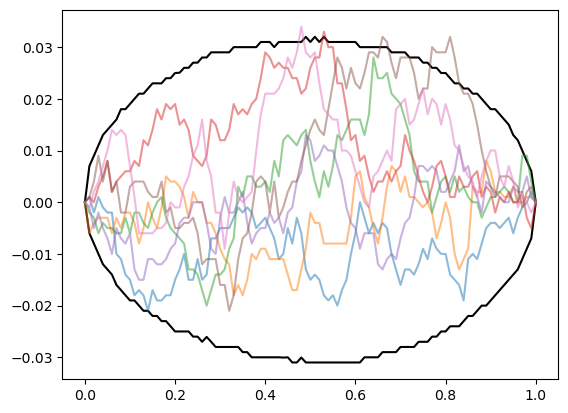

In [4]:

merged_theo_values = pd.DataFrame(theo_ecdf)
theo_quantiles = merged_theo_values.quantile([0.025, 0.975], axis = 0)


plt.plot(unique_values, theo_quantiles.iloc[0,:]- unique_values, label='2.5% quantile', color='black')
plt.plot(unique_values, theo_quantiles.iloc[1,:]- unique_values, label='97.5% quantile', color='black')
for ex in range(0, 7):
    theo_values = np.random.uniform(0, 100, 1000)
    theo_values = theo_values/100
    ecdf_v = [np.mean(theo_values <= i) for i in unique_values]
    plt.plot(unique_values, ecdf_v - unique_values, label=f'Test {ex+1}', alpha=0.5)
plt.show()

C:\Users\jb24583\AppData\Local\Temp\ipykernel_48304\4120798303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecdf_1['score'][ecdf_1['score'] == 'UM.test'] = 'UM-test'
C:\Users\jb24583\AppData\Local\Temp\ipykernel_48304\4120798303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecdf_1['score'][ecdf_1['score'] == 'M.test'] = 'M-test'


[]

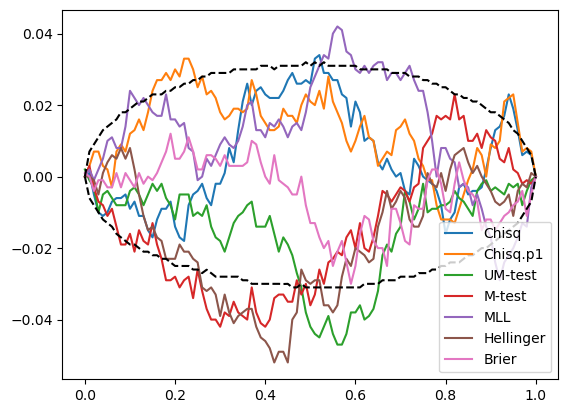

In [5]:
ecdf_1 = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/ecdf_body_1.csv')
ecdf_1['score'][ecdf_1['score'] == 'UM.test'] = 'UM-test'
ecdf_1['score'][ecdf_1['score'] == 'M.test'] = 'M-test'
ecdf_1['score'] = pd.Categorical(ecdf_1['score'], ordered=True)
for score in ecdf_1['score'].unique():
    ecdf_1_red = ecdf_1[ecdf_1['score'] == score]
    plt.plot(ecdf_1_red['value'], ecdf_1_red['ECDF'] - ecdf_1_red['value'], label = score)
plt.plot(unique_values, theo_quantiles.iloc[0,:] - unique_values,  color='black', linestyle='--')
plt.plot(unique_values, theo_quantiles.iloc[1,:] - unique_values,  color='black', linestyle='--')
plt.legend()
plt.plot()

In [6]:
import os 
os.listdir('C:/Users/jb24583/m_test_code/M_test/ecdf_body_075.csv')

NotADirectoryError: [WinError 267] The directory name is invalid: 'C:/Users/jb24583/m_test_code/M_test/ecdf_body_075.csv'

C:\Users\jb24583\AppData\Local\Temp\ipykernel_12252\1237309980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecdf_11['score'][ecdf_11['score'] == 'UM.test'] = 'UM-test'
C:\Users\jb24583\AppData\Local\Temp\ipykernel_12252\1237309980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecdf_11['score'][ecdf_11['score'] == 'M.test'] = 'M-test'


[]

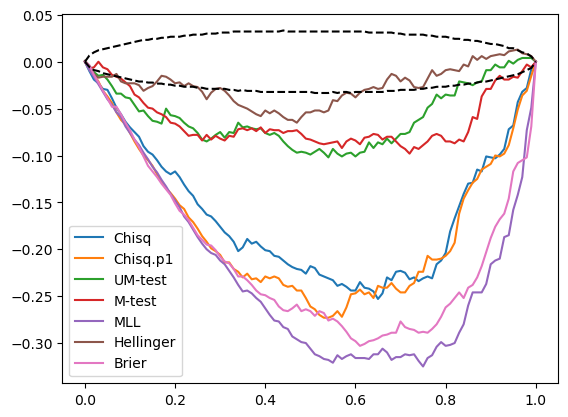

In [ ]:
ecdf_11 = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/ecdf_body_11.csv')

ecdf_11['score'][ecdf_11['score'] == 'UM.test'] = 'UM-test'
ecdf_11['score'][ecdf_11['score'] == 'M.test'] = 'M-test'
for score in ecdf_11['score'].unique():
    ecdf_11_red = ecdf_11[ecdf_11['score'] == score]
    plt.plot(ecdf_11_red['value'], ecdf_11_red['ECDF'] - ecdf_11_red['value'], label = score)
plt.plot(unique_values, theo_quantiles.iloc[0,:] - unique_values,  color='black', linestyle='--')
plt.plot(unique_values, theo_quantiles.iloc[1,:] - unique_values,  color='black', linestyle='--')
plt.legend()
plt.plot()

C:\Users\jb24583\AppData\Local\Temp\ipykernel_12252\2917783539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecdf_15['score'][ecdf_15['score'] == 'UM.test'] = 'UM-test'
C:\Users\jb24583\AppData\Local\Temp\ipykernel_12252\2917783539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecdf_15['score'][ecdf_15['score'] == 'M.test'] = 'M-test'


[]

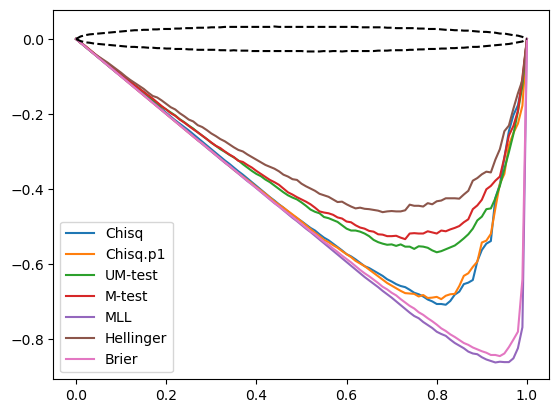

In [ ]:
ecdf_15 = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/ecdf_body_15.csv')

ecdf_15['score'][ecdf_15['score'] == 'UM.test'] = 'UM-test'
ecdf_15['score'][ecdf_15['score'] == 'M.test'] = 'M-test'
ecdf_toplot = ecdf_15
for score in ecdf_toplot['score'].unique():
    ecdf_toplot_red = ecdf_toplot[ecdf_toplot['score'] == score]
    plt.plot(ecdf_toplot_red['value'], ecdf_toplot_red['ECDF'] - ecdf_toplot_red['value'], label = score)
plt.plot(unique_values, theo_quantiles.iloc[0,:] - unique_values,  color='black', linestyle='--')
plt.plot(unique_values, theo_quantiles.iloc[1,:] - unique_values,  color='black', linestyle='--')
plt.legend()
plt.plot()

C:\Users\jb24583\AppData\Local\Temp\ipykernel_12252\889127842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecdf_09['score'][ecdf_09['score'] == 'UM.test'] = 'UM-test'
C:\Users\jb24583\AppData\Local\Temp\ipykernel_12252\889127842.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecdf_09['score'][ecdf_09['score'] == 'M.test'] = 'M-test'


[]

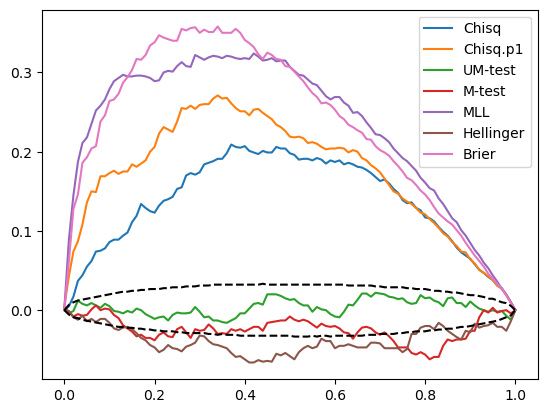

In [ ]:
ecdf_09 = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/ecdf_body_09.csv')

ecdf_09['score'][ecdf_09['score'] == 'UM.test'] = 'UM-test'
ecdf_09['score'][ecdf_09['score'] == 'M.test'] = 'M-test'
ecdf_toplot = ecdf_09
for score in ecdf_toplot['score'].unique():
    ecdf_toplot_red = ecdf_toplot[ecdf_toplot['score'] == score]
    plt.plot(ecdf_toplot_red['value'], ecdf_toplot_red['ECDF'] - ecdf_toplot_red['value'], label = score)
plt.plot(unique_values, theo_quantiles.iloc[0,:] - unique_values,  color='black', linestyle='--')
plt.plot(unique_values, theo_quantiles.iloc[1,:] - unique_values,  color='black', linestyle='--')
plt.legend()
plt.plot()

C:\Users\jb24583\AppData\Local\Temp\ipykernel_12252\980498731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecdf_75['score'][ecdf_75['score'] == 'UM.test'] = 'UM-test'
C:\Users\jb24583\AppData\Local\Temp\ipykernel_12252\980498731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecdf_75['score'][ecdf_75['score'] == 'M.test'] = 'M-test'


[]

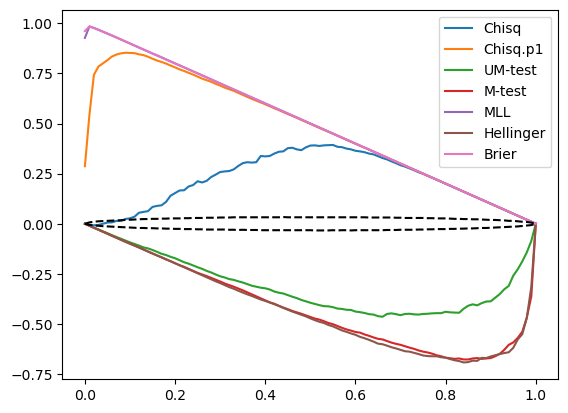

In [33]:
ecdf_75 = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/ecdf_body_075.csv')
ecdf_75['score'][ecdf_75['score'] == 'UM.test'] = 'UM-test'
ecdf_75['score'][ecdf_75['score'] == 'M.test'] = 'M-test'
ecdf_toplot = ecdf_75
for score in ecdf_toplot['score'].unique():
    ecdf_toplot_red = ecdf_toplot[ecdf_toplot['score'] == score]
    plt.plot(ecdf_toplot_red['value'], ecdf_toplot_red['ECDF'] - ecdf_toplot_red['value'], label = score)
plt.plot(unique_values, theo_quantiles.iloc[0,:] - unique_values,  color='black', linestyle='--')
plt.plot(unique_values, theo_quantiles.iloc[1,:] - unique_values,  color='black', linestyle='--')
plt.legend()
plt.plot()

In [25]:
ecdf_11 = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/ecdf_body_11.csv')
ecdf_15 = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/ecdf_body_15.csv')
ecdf_09 = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/ecdf_body_09.csv')
ecdf_75 = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/ecdf_body_075.csv')


In [26]:
score_names = {'Brier': 'Brier', 'Chisq' : 'Chisq', 'Chisq.p1': 'Chisq+1', 'Hellinger': 'Hellinger', 'M.test': 'M-test', 'MLL': 'MLL', 'UM.test': 'UM-test'}

for score in ecdf_11['score'].unique():
    ecdf_11.loc[ecdf_11['score'] == score,'score'] = score_names[score]
for score in ecdf_15['score'].unique():
    ecdf_15.loc[ecdf_15['score'] == score,'score'] = score_names[score]
for score in ecdf_09['score'].unique():
    ecdf_09.loc[ecdf_09['score'] == score,'score'] = score_names[score]
for score in ecdf_75['score'].unique():
    ecdf_75.loc[ecdf_75['score'] == score,'score'] = score_names[score]


In [27]:
import matplotlib.cm as cm
#colors = cm.copper(np.linspace(0, 1, len(ecdf_toplot['score'].unique())))
colors = cm.get_cmap('tab10').colors[:7]
score_colors = {'Brier': colors[6], 'Chisq': colors[0], 'Chisq+1' : colors[1], 'Hellinger': colors[4], 'M-test' : colors[3], 'MLL': colors[5], 'UM-test': colors[2]}


C:\Users\jb24583\AppData\Local\Temp\ipykernel_48304\2762496125.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10').colors[:7]


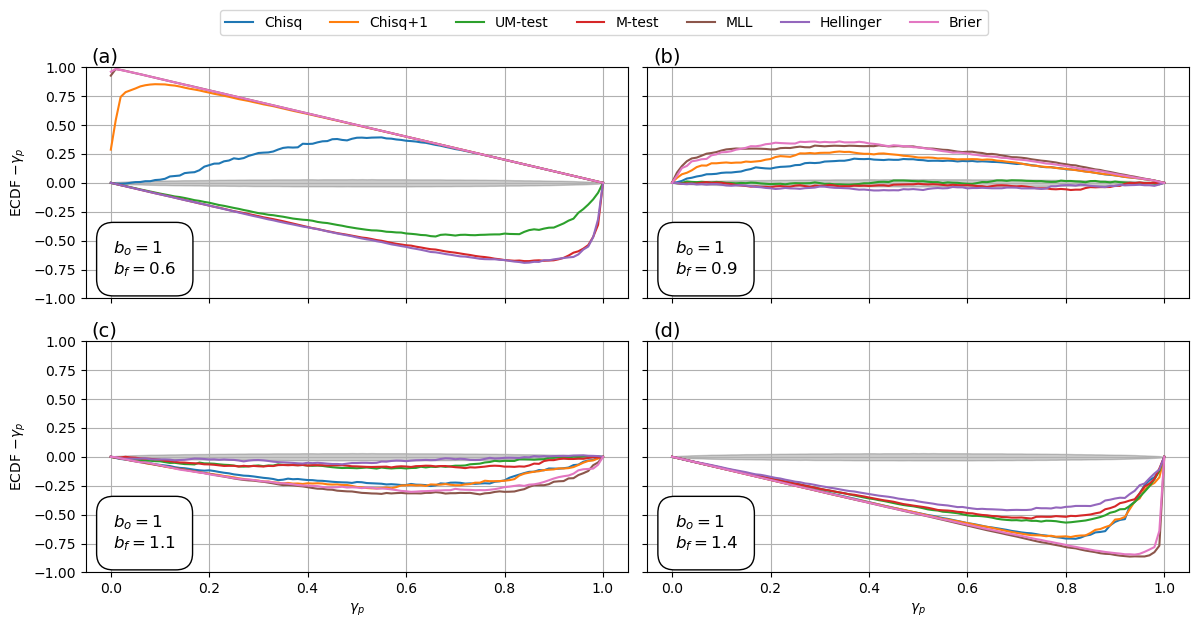

In [31]:

handles, labels = [], []

fig, axes = plt.subplots(2, 2, figsize=(12, 6))
ecdf_toplot = ecdf_75
for idx, score in enumerate(ecdf_toplot['score'].unique()):
    ecdf_toplot_red = ecdf_toplot[ecdf_toplot['score'] == score]
    line, = axes[0,0].plot(ecdf_toplot_red['value'], ecdf_toplot_red['ECDF'] - ecdf_toplot_red['value'], label = score, color = score_colors[score])
    handles.append(line)
    labels.append(score)
#axes[0,0].plot(unique_values, theo_quantiles.iloc[0,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
#axes[0,0].plot(unique_values, theo_quantiles.iloc[1,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
axes[0,0].fill_between(unique_values, theo_quantiles.iloc[0,:] - unique_values, theo_quantiles.iloc[1,:] - unique_values, color='black', alpha=0.2)
axes[0, 0].grid(True)
axes[0, 0].set_ylim(-1,1)
axes[0, 0].set_xticklabels([])
axes[0, 0].set_ylabel('ECDF $- \gamma_p$')
text_str = '$b_o = 1$\n$b_f = 0.6$' 
axes[0, 0].text(0.05, 0.17, text_str, transform=axes[0, 0].transAxes, 
                fontsize=12, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[0,0].text(0.01, 1.02, '(a)', transform=axes[0, 0].transAxes, fontsize=14)




ecdf_toplot = ecdf_11
for idx, score in enumerate(ecdf_toplot['score'].unique()):
    ecdf_toplot_red = ecdf_toplot[ecdf_toplot['score'] == score]
    line, = axes[1, 0].plot(ecdf_toplot_red['value'], ecdf_toplot_red['ECDF'] - ecdf_toplot_red['value'], label = score, color = score_colors[score])
#axes[0,1].plot(unique_values, theo_quantiles.iloc[0,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
#axes[0,1].plot(unique_values, theo_quantiles.iloc[1,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
axes[1, 0].fill_between(unique_values, theo_quantiles.iloc[0,:] - unique_values, theo_quantiles.iloc[1,:] - unique_values, color='black', alpha=0.2)
axes[1, 0].grid(True)
axes[1, 0].set_ylim(-1,1)
axes[1, 0].set_xlabel('$\gamma_p$')
axes[1, 0].set_ylabel('ECDF $- \gamma_p$')
text_str = '$b_o = 1$\n$b_f = 1.1$' 
axes[1, 0].text(0.05, 0.17, text_str, transform=axes[1, 0].transAxes, 
                fontsize=12, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[1,0].text(0.01, 1.02, '(c)', transform=axes[1, 0].transAxes, fontsize=14)


ecdf_toplot = ecdf_09
for idx, score in enumerate(ecdf_toplot['score'].unique()):
    ecdf_toplot_red = ecdf_toplot[ecdf_toplot['score'] == score]
    line, = axes[0, 1].plot(ecdf_toplot_red['value'], ecdf_toplot_red['ECDF'] - ecdf_toplot_red['value'], label = score, color = score_colors[score])
#axes[1,0].plot(unique_values, theo_quantiles.iloc[0,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
#axes[1,0].plot(unique_values, theo_quantiles.iloc[1,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
axes[0, 1].fill_between(unique_values, theo_quantiles.iloc[0,:] - unique_values, theo_quantiles.iloc[1,:] - unique_values, color='black', alpha=0.2)
axes[0, 1].grid(True)
axes[0, 1].set_ylim(-1,1)
axes[0, 1].set_ylabel('')
axes[0, 1].set_xlabel('')
axes[0, 1].set_yticklabels([])
axes[0, 1].set_xticklabels([])
text_str = '$b_o = 1$\n$b_f = 0.9$' 
axes[0, 1].text(0.05, 0.17, text_str, transform=axes[0, 1].transAxes, 
                fontsize=12, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[0,1].text(0.01, 1.02, '(b)', transform=axes[0, 1].transAxes, fontsize=14)

ecdf_toplot = ecdf_15
for idx, score in enumerate(ecdf_toplot['score'].unique()):
    ecdf_toplot_red = ecdf_toplot[ecdf_toplot['score'] == score]
    line, = axes[1,1].plot(ecdf_toplot_red['value'], ecdf_toplot_red['ECDF'] - ecdf_toplot_red['value'], label = score, color = score_colors[score])
#axes[1,1].plot(unique_values, theo_quantiles.iloc[0,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
#axes[1,1].plot(unique_values, theo_quantiles.iloc[1,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
axes[1,1].fill_between(unique_values, theo_quantiles.iloc[0,:] - unique_values, theo_quantiles.iloc[1,:] - unique_values, color='black', alpha=0.2)
axes[1, 1].grid(True)
axes[1, 1].set_ylim(-1,1)
axes[1, 1].set_yticklabels([])
axes[1, 1].set_xlabel('$\gamma_p$')

text_str = '$b_o = 1$\n$b_f = 1.4$' 
axes[1, 1].text(0.05, 0.17, text_str, transform=axes[1, 1].transAxes, 
                fontsize=12, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[1,1].text(0.01, 1.02, '(d)', transform=axes[1, 1].transAxes, fontsize=14)


fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(handles))
plt.tight_layout()

plt.savefig('C:/Users/jb24583/m_test_code/M_test/ecdf_body_500.png', dpi=500, bbox_inches='tight')

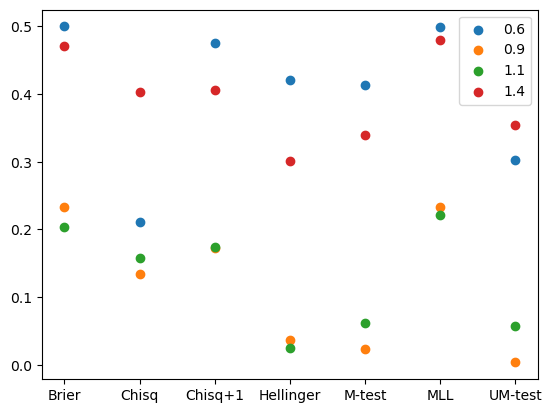

In [83]:
res_list = []
for score, df in ecdf_75.groupby('score'):
    res_list.append([score, 
                     np.abs(np.trapz(df['ECDF'] - df['value'], df['value']) ), 
                     1,
                     0.6]) 
for score, df in ecdf_11.groupby('score'):
    res_list.append([score, 
                     np.abs(np.trapz(df['ECDF'] - df['value'], df['value']) ), 
                     1,
                     1.1])
for score, df in ecdf_09.groupby('score'):
    res_list.append([score, 
                     np.abs(np.trapz(df['ECDF'] - df['value'], df['value']) ), 
                     1,
                     0.9])
for score, df in ecdf_15.groupby('score'):
    res_list.append([score, 
                     np.abs(np.trapz(df['ECDF'] - df['value'], df['value']) ), 
                     1,
                     1.4])


dd = pd.DataFrame(res_list, columns = ['score', 'integral', 'bo', 'bf']).sort_values(['score', 'bf'])

for bf, df in dd.groupby('bf'):
    plt.scatter(df['score'], df['integral'], marker='o', label = bf)
plt.legend()
plt.show()

In [32]:
boxplot_1 = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/boxplot_body_1_s4.csv')
ecdf_1 = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/ecdf_body_1_s4.csv')

for score in ecdf_1['score'].unique():
    ecdf_1.loc[ecdf_1['score'] == score,'score'] = score_names[score]
for score in boxplot_1['score'].unique():
    boxplot_1.loc[boxplot_1['score'] == score,'score'] = score_names[score]

Chisq
Chisq+1
UM-test
M-test
MLL
Hellinger
Brier


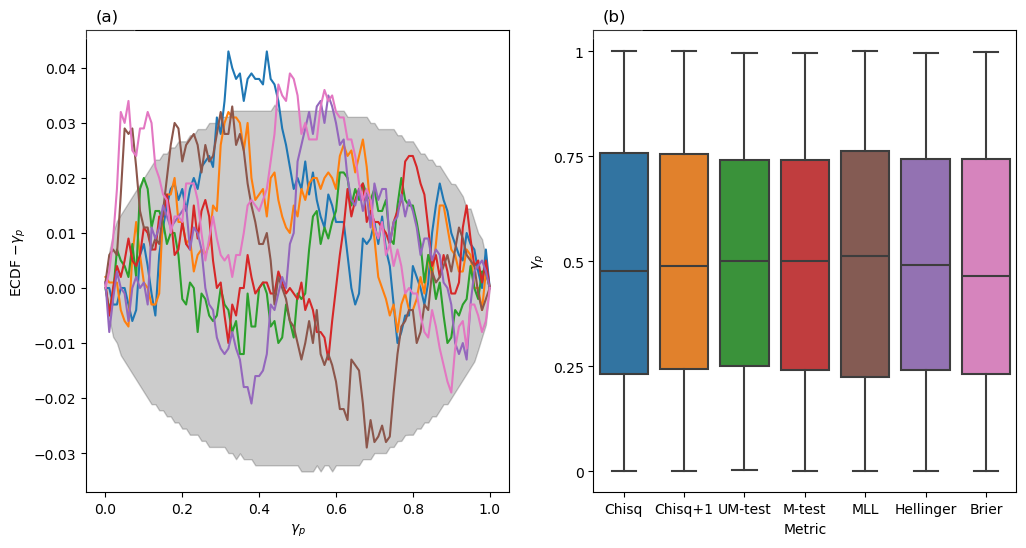

In [64]:
#colors = sns.color_palette("colorblind", 7)#["#2EE61DE4", "#E9566F", '#009E73', '#F0E442', '#0072B2', '#D55E00', "#56D5F5"]
from matplotlib import cm


fig, axes = plt.subplots(1, 2, figsize=(12, 6))


for idx, score in enumerate(ecdf_1['score'].unique()):
    ecdf_1_red = ecdf_1[ecdf_1['score'] == score]
    print(score)
    axes[0].plot(ecdf_1_red['value'], ecdf_1_red['ECDF'] - ecdf_1_red['value'], label = score, color = score_colors[score])

axes[0].fill_between(unique_values, theo_quantiles.iloc[0,:] - unique_values, theo_quantiles.iloc[1,:] - unique_values, color='black', alpha=0.2)
axes[0].set_xlabel('$\gamma_p$')
axes[0].set_ylabel('ECDF $- \gamma_p$')


axes[1].text(0.05, 1.03, '(a)', transform=axes[0].transAxes, 
                fontsize=12, va='center', ha='center',
                bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=1', alpha=0.2))


sns.boxplot(x='score', y='value', data=boxplot_1, palette=score_colors, ax = axes[1])
axes[1].set_yticks([0, 0.25, 0.5, 0.75, 1])
axes[1].set_yticklabels([0, 0.25, 0.5, 0.75, 1])
axes[1].set_ylabel('$\gamma_p$')
axes[1].set_xlabel('Metric')
axes[1].text(0.05, 1.03, '(b)', transform=axes[1].transAxes, 
                fontsize=12, va='center', ha='center',
                bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=1', alpha=0.2))

plt.savefig('C:/Users/jb24583/m_test_code/M_test/ecdf_boxplot_body_13232.png', dpi=500, bbox_inches='tight')

In [88]:
res_list = []
for score, df in ecdf_1.groupby('score'):
    res_list.append([score, np.abs(np.trapz(df['ECDF'] - df['value'], df['value']) )])
pd.DataFrame(res_list, columns = ['score', 'integral'])

,score,integral
0,Brier,0.005065
1,Chisq,0.005390
2,Chisq.p1,0.012940
3,Hellinger,0.017220
4,M-test,0.014870
5,MLL,0.012300
6,UM-test,0.014570


In [65]:
boxplot_11 = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/boxplot_body_11.csv')
for score in boxplot_11['score'].unique():
    boxplot_11.loc[boxplot_11['score'] == score,'score'] = score_names[score]

boxplot_06 = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/boxplot_body_075.csv')
for score in boxplot_06['score'].unique():
    boxplot_06.loc[boxplot_06['score'] == score,'score'] = score_names[score]

boxplot_14 = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/boxplot_body_15.csv')
for score in boxplot_14['score'].unique():
    boxplot_14.loc[boxplot_14['score'] == score,'score'] = score_names[score]

boxplot_09 = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/boxplot_body_09.csv')
for score in boxplot_09['score'].unique():
    boxplot_09.loc[boxplot_09['score'] == score,'score'] = score_names[score]


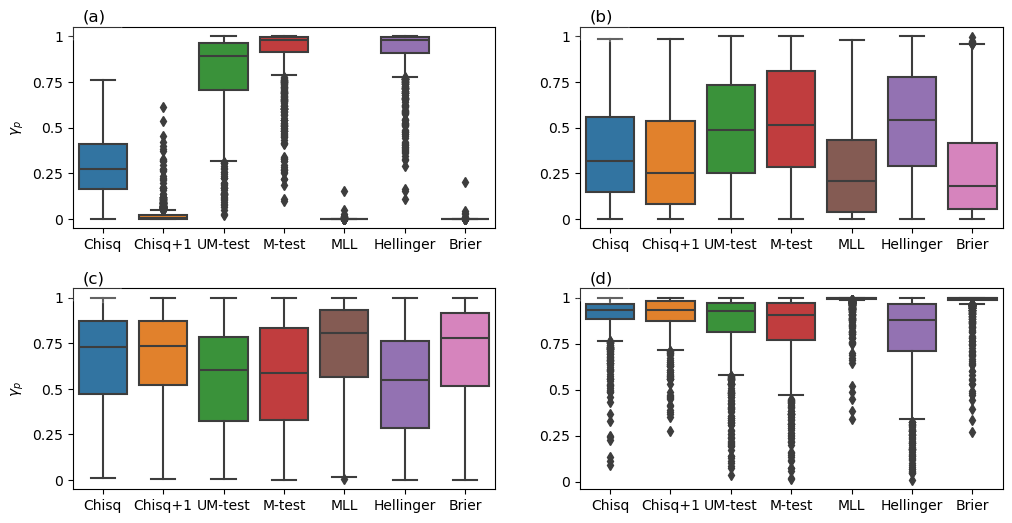

In [66]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))


#score_colors = {'Brier': colors[6], 'Chisq': colors[0], 'Chisq.p1' : colors[1], 'Hellinger': colors[5], 'M-test' : colors[3], 'MLL': colors[4], 'UM-test': colors[2]}
sns.boxplot(x='score', y='value', data=boxplot_06, palette=score_colors, ax = axes[0, 0])
axes[0, 0].set_yticks([0, 0.25, 0.5, 0.75, 1])
axes[0, 0].set_yticklabels([0, 0.25, 0.5, 0.75, 1])
axes[0, 0].set_ylabel('$\gamma_p$')
axes[0, 0].set_xlabel('')
axes[0, 0].text(0.05, 1.05, '(a)', transform=axes[0, 0].transAxes, 
                fontsize=12, va='center', ha='center',
                bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=1', alpha=0.2))

sns.boxplot(x='score', y='value', data=boxplot_11, palette=score_colors, ax = axes[1, 0])
axes[1, 0].set_yticks([0, 0.25, 0.5, 0.75, 1])
axes[1, 0].set_yticklabels([0, 0.25, 0.5, 0.75, 1])
axes[1, 0].set_ylabel('$\gamma_p$')
axes[1, 0].set_xlabel('')
axes[1, 0].text(0.05, 1.05, '(c)', transform=axes[1, 0].transAxes, 
                fontsize=12, va='center', ha='center',
                bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=1', alpha=0.2))

sns.boxplot(x='score', y='value', data=boxplot_09, palette=score_colors, ax = axes[0, 1])
axes[0, 1].set_yticks([0, 0.25, 0.5, 0.75, 1])
axes[0, 1].set_yticklabels([0, 0.25, 0.5, 0.75, 1])
axes[0, 1].set_ylabel('')
axes[0, 1].set_xlabel('')
axes[0, 1].text(0.05, 1.05, '(b)', transform=axes[0, 1].transAxes, 
                fontsize=12, va='center', ha='center',
                bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=1', alpha=0.2))

sns.boxplot(x='score', y='value', data=boxplot_14, palette=score_colors, ax = axes[1, 1])
axes[1, 1].set_yticks([0, 0.25, 0.5, 0.75, 1])
axes[1, 1].set_yticklabels([0, 0.25, 0.5, 0.75, 1])
axes[1, 1].set_ylabel('')
axes[1, 1].set_xlabel('')
axes[1, 1].text(0.05, 1.05, '(d)', transform=axes[1, 1].transAxes, 
                fontsize=12, va='center', ha='center',
                bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=1', alpha=0.2))
fig.subplots_adjust(hspace=0.3) 
plt.savefig('C:/Users/jb24583/m_test_code/M_test/boxplot_body.png', dpi=500, bbox_inches='tight')

In [6]:
dj_prob = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/dj_prob_df.csv')
dj_prob

,Dj,dobs,Lambda_N
0,13.128572,3.222593,25
1,16.761680,3.222593,25
2,10.026246,3.222593,25
3,15.351580,3.222593,25
4,9.668310,3.222593,25
...,...,...,...
4995,0.658715,3.342230,500
4996,0.777762,3.342230,500
4997,1.011185,3.342230,500
4998,0.705975,3.342230,500


c:\Users\jb24583\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jb24583\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jb24583\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jb24583\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

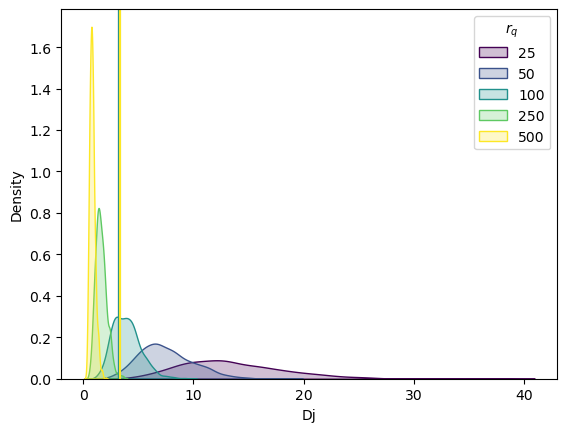

In [7]:
import matplotlib.cm as cm
colors = cm.viridis(np.linspace(0, 1, len(dj_prob['Lambda_N'].unique())))

for idx, rate in enumerate(dj_prob['Lambda_N'].unique()):
    dj_prob_red = dj_prob[dj_prob['Lambda_N'] == rate]
    sns.kdeplot(dj_prob_red['Dj'], fill=True, label = rate, color = colors[idx])
    do = dj_prob_red['dobs'].iloc[0]
    plt.axvline(x = do, color = colors[idx])  
plt.legend(title = '$r_q$')
plt.savefig('C:/Users/jb24583/m_test_code/M_test/dj_prob.png', dpi=500, bbox_inches='tight')

c:\Users\jb24583\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jb24583\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jb24583\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jb24583\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

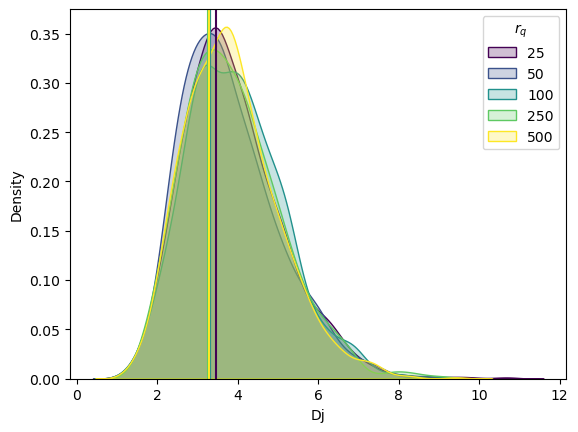

In [8]:
dj_sol = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/dj_sol_df.csv')

for idx, rate in enumerate(dj_sol['Lambda_N'].unique()):
    dj_sol_red = dj_sol[dj_sol['Lambda_N'] == rate]
    sns.kdeplot(dj_sol_red['Dj'], fill=True, label = rate, color = colors[idx])
    do = dj_sol_red['dobs'].iloc[0]
    plt.axvline(x = do, color = colors[idx], )  
plt.legend(title = '$r_q$')
plt.savefig('C:/Users/jb24583/m_test_code/M_test/dj_sol.png', dpi=500, bbox_inches='tight')

c:\Users\jb24583\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jb24583\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jb24583\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jb24583\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

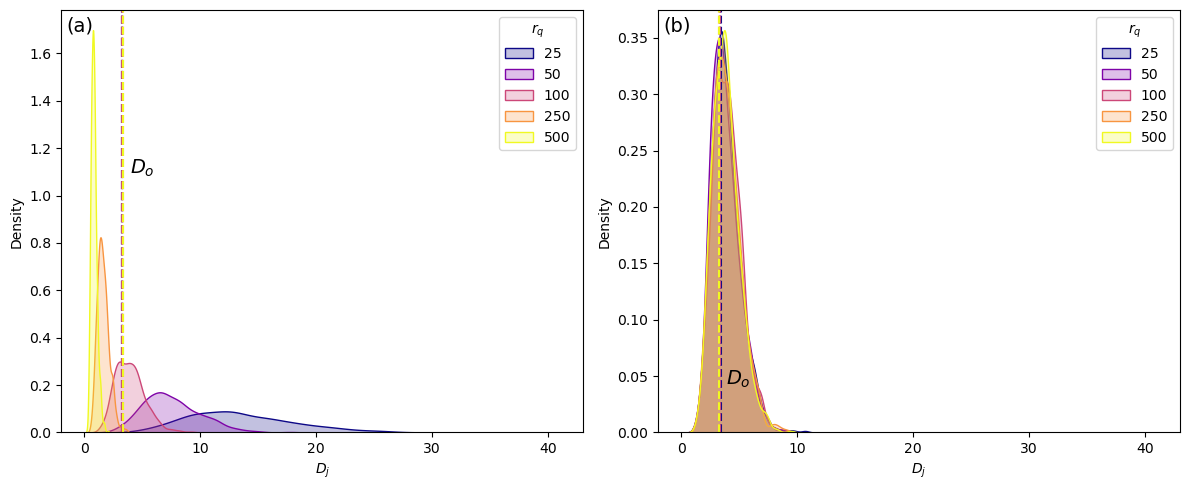

In [110]:
unique_rates = sorted(dj_prob['Lambda_N'].unique())
colors = cm.plasma(np.linspace(0, 1, len(unique_rates)))#viridis(np.linspace(0, 1, len(unique_rates)))

# --- Create figure and axes ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=False)

# --- First subplot: dj_prob ---
ax = axes[0]
for idx, rate in enumerate(unique_rates):
    dj_prob_red = dj_prob[dj_prob['Lambda_N'] == rate]
    sns.kdeplot(dj_prob_red['Dj'], fill=True, label=rate, color=colors[idx], ax=ax)
    
    do = dj_prob_red['dobs'].iloc[0]
    ax.axvline(x=do, color=colors[idx], linestyle='--')
    # Annotate D_o near the vertical line
    ymax = ax.get_ylim()[1]

ax.text(do*1.5, ymax * 0.6, r'$D_o$', color='black',
            rotation=0, ha='center', va='bottom', fontsize=14)
    
ax.legend(title='$r_q$')
ax.set_xlabel(r'$D_j$')
ax.set_ylabel('Density')
ax.text(0.01, 0.95, '(a)', transform=ax.transAxes, fontsize=14)

# --- Second subplot: dj_sol ---
ax = axes[1]
for idx, rate in enumerate(unique_rates):
    dj_sol_red = dj_sol[dj_sol['Lambda_N'] == rate]
    sns.kdeplot(dj_sol_red['Dj'], fill=True, label=rate, color=colors[idx], ax=ax)
    
    do = dj_sol_red['dobs'].iloc[0]
    ax.axvline(x=do, color=colors[idx], linestyle='--')
    # Annotate D_o near the vertical line
    ymax = ax.get_ylim()[1]

ax.text(do*1.5, ymax * 0.1, r'$D_o$', color='black',
            rotation=0, ha='center', va='bottom', fontsize=14)
    
ax.legend(title='$r_q$')
ax.set_xlabel(r'$D_j$')
ax.text(0.01, 0.95, '(b)', transform=ax.transAxes, fontsize=14)

# --- Adjust layout and save ---
plt.tight_layout()
plt.savefig('C:/Users/jb24583/m_test_code/M_test/dj_combined.png', dpi=500, bbox_inches='tight')
plt.show()

In [69]:
df_tapgr = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/df_tapgr.csv')
df_tapgr

,mag,freq,Mc,b
0,2.5,6.000000,5.0,0.75
1,2.6,5.924968,5.0,0.75
2,2.7,5.849923,5.0,0.75
3,2.8,5.774860,5.0,0.75
4,2.9,5.699770,5.0,0.75
...,...,...,...,...
627,9.6,-2.875000,inf,1.25
628,9.7,-3.000000,inf,1.25
629,9.8,-3.125000,inf,1.25
630,9.9,-3.250000,inf,1.25


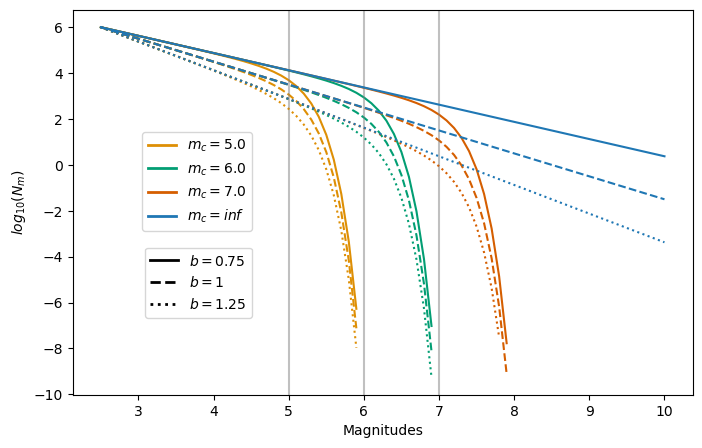

In [111]:
fig, ax = plt.subplots(figsize=(8, 5))
threshold = 0.2
# Plot lines for each group

palette = sns.color_palette("colorblind", n_colors=4)
mc_colors = {}  # Store colors for Mc values

linestyles = {0.75: "-", 1: "--", 1.25: ":"}

# Plot lines for each (Mc, b) group
for (mc, b), group in df_tapgr.groupby(["Mc", "b"]):
    # Assign a color, handling Mc = np.inf separately
    if mc not in mc_colors:
        mc_colors[mc] = 'tab:blue' if mc == np.inf else palette[int(mc) % len(palette)]
    
    ax.plot(group["mag"], group["freq"], label=f"$M_c={mc}, b={b}$", 
            color=mc_colors[mc], 
            linestyle=linestyles.get(b, "-"))  
    ax.axvline(x = mc, color = 'grey', alpha = 0.2)


mc_legend_handles = [plt.Line2D([0], [0], color=color, lw=2, label=f"$m_c={mc}$") 
                     for mc, color in mc_colors.items()]
mc_legend = ax.legend(handles=mc_legend_handles, title="", bbox_to_anchor=(0.3, 0.7))

# Legend for b (linestyles)
b_legend_handles = [plt.Line2D([0], [0], color="black", linestyle=ls, lw=2, label=f"$b={b}$") 
                     for b, ls in linestyles.items()]
b_legend = ax.legend(handles=b_legend_handles, title="", bbox_to_anchor=(0.3, 0.4))

# Add Mc legend back to plot
ax.add_artist(mc_legend)
# Show legend
ax.set_ylabel('$log_{10}(N_m)$')
ax.set_xlabel('Magnitudes')
plt.savefig('C:/Users/jb24583/m_test_code/M_test/tapgr.png', dpi=500, bbox_inches='tight')

C:\Users\jb24583\AppData\Local\Temp\ipykernel_48304\3407638621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecdf_1['score'][ecdf_1['score'] == 'UM.test'] = 'UM-test'
C:\Users\jb24583\AppData\Local\Temp\ipykernel_48304\3407638621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecdf_1['score'][ecdf_1['score'] == 'M.test'] = 'M-test'


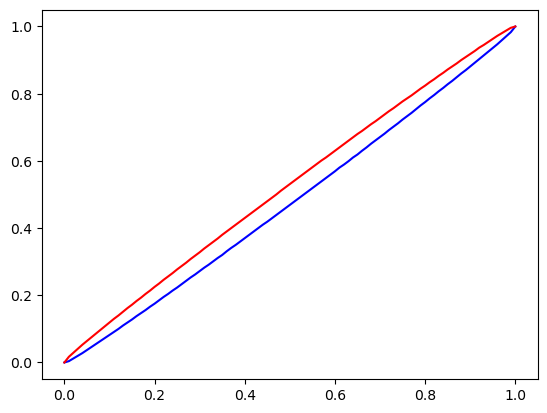

In [33]:
ecdf_1 = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/ecdf_body_1.csv')
ecdf_1['score'][ecdf_1['score'] == 'UM.test'] = 'UM-test'
ecdf_1['score'][ecdf_1['score'] == 'M.test'] = 'M-test'
theo_ecdf = []
unique_values = ecdf_1['value'].unique()

for i in range(1, 20000):
    theo_values = np.random.uniform(0, 1, 1000)
    ecdf_v = [np.mean(theo_values <= i) for i in unique_values]
    theo_ecdf.append(ecdf_v)

merged_theo_values = pd.DataFrame(theo_ecdf)
theo_quantiles = merged_theo_values.quantile([0.025, 0.975], axis = 0)
plt.plot(unique_values, theo_quantiles.iloc[0,:], label='2.5% quantile', color='blue')
plt.plot(unique_values, theo_quantiles.iloc[1,:], label='97.5% quantile', color='red')
plt.show()

In [34]:
df_over = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/df_ecdf_over.csv')
score_names = {'Brier': 'Brier', 'Chisq' : 'Chisq', 'Chisq.p1': 'Chisq+1', 'Hellinger': 'Hellinger', 'Mtest': 'M-test', 'Multinomial': 'MLL', 'Mtest.un': 'UM-test'}

for score in df_over['score'].unique():
    df_over.loc[df_over['score'] == score,'score'] = score_names[score]

C:\Users\jb24583\AppData\Local\Temp\ipykernel_48304\3307165153.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ecdf_toplot = ecdf_toplot[df_over['b'] == 0.75]
C:\Users\jb24583\AppData\Local\Temp\ipykernel_48304\3307165153.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ecdf_toplot = ecdf_toplot[df_over['b'] == 0.75]
C:\Users\jb24583\AppData\Local\Temp\ipykernel_48304\3307165153.py:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ecdf_toplot = ecdf_toplot[df_over['b'] == 0.75]
C:\Users\jb24583\AppData\Local\Temp\ipykernel_48304\3307165153.py:82: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ecdf_toplot = ecdf_toplot[df_over['b'] == 1]
C:\Users\jb24583\AppData\Local\Temp\ipykernel_48304\3307165153.py:105: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ecdf_toplot = ecdf_toplot[df_over['b'] == 1]
C:\Users\jb24583\AppData\

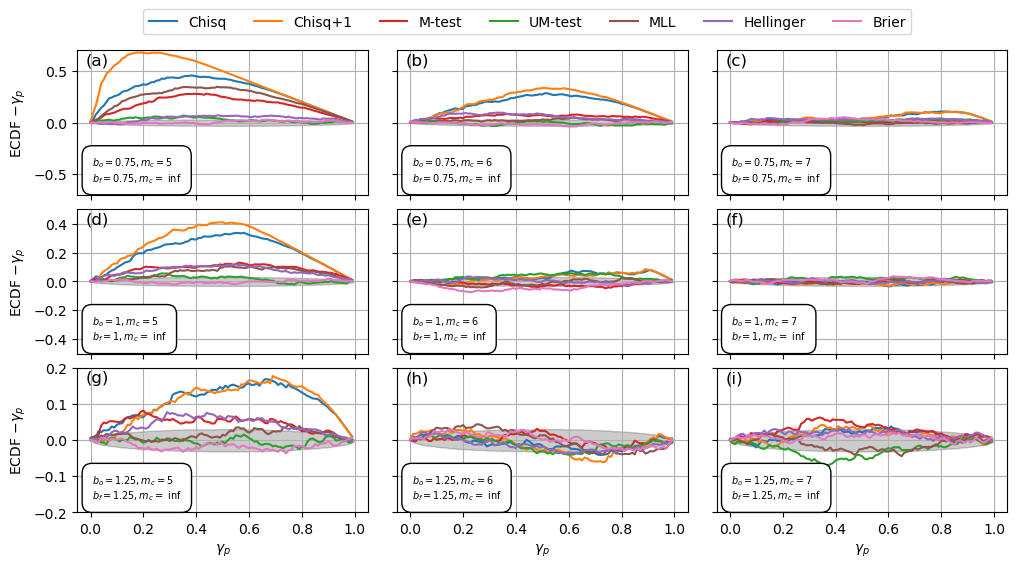

In [ ]:
import matplotlib.cm as cm
#colors = cm.copper(np.linspace(0, 1, len(ecdf_toplot['score'].unique())))
y_lim = [-0.7, 0.7]
handles, labels = [], []
gamma_values = np.arange(0,1,0.01)
fig, axes = plt.subplots(3, 3, figsize=(12, 6))
#colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7']

ecdf_toplot = df_over[df_over['Mc'] == 5]
ecdf_toplot = ecdf_toplot[df_over['b'] == 0.75]  
for idx, score in enumerate(ecdf_toplot['score'].unique()):
    ecdf_toplot_red = ecdf_toplot[ecdf_toplot['score'] == score]
    #line, = sns.ecdfplot(ecdf_toplot_red['value'], label = score, color = colors[idx], ax = axes[0,0])#
    sorted_values = np.sort(ecdf_toplot_red['value'])
    ecdf = [np.mean(sorted_values <= x) for x in gamma_values]
    line, = axes[0,0].plot(gamma_values, ecdf - gamma_values, label = score, color = score_colors[score])
    handles.append(line)
    labels.append(score)
#axes[0,0].plot(unique_values, theo_quantiles.iloc[0,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
#axes[0,0].plot(unique_values, theo_quantiles.iloc[1,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
axes[0,0].fill_between(unique_values, theo_quantiles.iloc[0,:] - unique_values, theo_quantiles.iloc[1,:] - unique_values, color='black', alpha=0.2)
axes[0, 0].grid(True)
axes[0, 0].set_ylim(y_lim[0], y_lim[1])
axes[0, 0].set_xticklabels([])
axes[0, 0].set_ylabel('ECDF $- \gamma_p$')
text_str = '$b_o = 0.75, m_c = 5$\n$b_f = 0.75, m_c = $ inf' 
axes[0, 0].text(0.05, 0.17, text_str, transform=axes[0, 0].transAxes, 
                fontsize=7, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[0, 0].text(0.03, 0.9, '(a)', transform=axes[0, 0].transAxes, 
                fontsize=12)

ecdf_toplot = df_over[df_over['Mc'] == 6]
ecdf_toplot = ecdf_toplot[df_over['b'] == 0.75]  
for idx, score in enumerate(ecdf_toplot['score'].unique()):
    ecdf_toplot_red = ecdf_toplot[ecdf_toplot['score'] == score]
    #line, = sns.ecdfplot(ecdf_toplot_red['value'], label = score, color = colors[idx], ax = axes[0,0])#
    sorted_values = np.sort(ecdf_toplot_red['value'])
    ecdf = [np.mean(sorted_values <= x) for x in gamma_values]
    line, = axes[0, 1].plot(gamma_values, ecdf - gamma_values, label = score, color = score_colors[score])
    
#axes[0,0].plot(unique_values, theo_quantiles.iloc[0,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
#axes[0,0].plot(unique_values, theo_quantiles.iloc[1,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
axes[0, 1].fill_between(unique_values, theo_quantiles.iloc[0,:] - unique_values, theo_quantiles.iloc[1,:] - unique_values, color='black', alpha=0.2)
axes[0, 1].grid(True)
axes[0, 1].set_ylim(y_lim[0], y_lim[1])
axes[0, 1].set_xticklabels([])
axes[0, 1].set_yticklabels([])
axes[0, 1].set_ylabel('')
text_str = '$b_o = 0.75, m_c = 6$\n$b_f = 0.75, m_c = $ inf' 
axes[0, 1].text(0.05, 0.17, text_str, transform=axes[0, 1].transAxes, 
                fontsize=7, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[0, 1].text(0.03, 0.9, '(b)', transform=axes[0, 1].transAxes, 
                fontsize=12)

ecdf_toplot = df_over[df_over['Mc'] == 7]
ecdf_toplot = ecdf_toplot[df_over['b'] == 0.75]  
for idx, score in enumerate(ecdf_toplot['score'].unique()):
    ecdf_toplot_red = ecdf_toplot[ecdf_toplot['score'] == score]
    #line, = sns.ecdfplot(ecdf_toplot_red['value'], label = score, color = colors[idx], ax = axes[0,0])#
    sorted_values = np.sort(ecdf_toplot_red['value'])
    ecdf = [np.mean(sorted_values <= x) for x in gamma_values]
    line, = axes[0, 2].plot(gamma_values, ecdf - gamma_values, label = score, color = score_colors[score])
  
#axes[0,0].plot(unique_values, theo_quantiles.iloc[0,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
#axes[0,0].plot(unique_values, theo_quantiles.iloc[1,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
axes[0, 2].fill_between(unique_values, theo_quantiles.iloc[0,:] - unique_values, theo_quantiles.iloc[1,:] - unique_values, color='black', alpha=0.2)
axes[0, 2].grid(True)
axes[0, 2].set_ylim(y_lim[0], y_lim[1])
axes[0, 2].set_xticklabels([])
axes[0, 2].set_yticklabels([])
axes[0, 2].set_ylabel('')
text_str = '$b_o = 0.75, m_c = 7$\n$b_f = 0.75, m_c = $ inf' 
axes[0, 2].text(0.05, 0.17, text_str, transform=axes[0, 2].transAxes, 
                fontsize=7, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[0, 2].text(0.03, 0.9, '(c)', transform=axes[0, 2].transAxes, 
                fontsize=12)
y_lim = [-0.5, 0.5]

ecdf_toplot = df_over[df_over['Mc'] == 5]
ecdf_toplot = ecdf_toplot[df_over['b'] == 1]  
for idx, score in enumerate(ecdf_toplot['score'].unique()):
    ecdf_toplot_red = ecdf_toplot[ecdf_toplot['score'] == score]
    #line, = sns.ecdfplot(ecdf_toplot_red['value'], label = score, color = colors[idx], ax = axes[0,0])#
    sorted_values = np.sort(ecdf_toplot_red['value'])
    ecdf = [np.mean(sorted_values <= x) for x in gamma_values]
    line, = axes[1, 0].plot(gamma_values, ecdf - gamma_values, label = score, color = score_colors[score])
   
#axes[0,0].plot(unique_values, theo_quantiles.iloc[0,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
#axes[0,0].plot(unique_values, theo_quantiles.iloc[1,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
axes[1, 0].fill_between(unique_values, theo_quantiles.iloc[0,:] - unique_values, theo_quantiles.iloc[1,:] - unique_values, color='black', alpha=0.2)
axes[1, 0].grid(True)
axes[1, 0].set_ylim(y_lim[0], y_lim[1])
axes[1, 0].set_xticklabels([])
axes[1, 0].set_ylabel('ECDF $- \gamma_p$')
text_str = '$b_o = 1, m_c = 5$\n$b_f = 1, m_c = $ inf' 
axes[1, 0].text(0.05, 0.17, text_str, transform=axes[1, 0].transAxes, 
                fontsize=7, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[1, 0].text(0.03, 0.9, '(d)', transform=axes[1, 0].transAxes, 
                fontsize=12)

ecdf_toplot = df_over[df_over['Mc'] == 6]
ecdf_toplot = ecdf_toplot[df_over['b'] == 1]  
for idx, score in enumerate(ecdf_toplot['score'].unique()):
    ecdf_toplot_red = ecdf_toplot[ecdf_toplot['score'] == score]
    #line, = sns.ecdfplot(ecdf_toplot_red['value'], label = score, color = colors[idx], ax = axes[0,0])#
    sorted_values = np.sort(ecdf_toplot_red['value'])
    ecdf = [np.mean(sorted_values <= x) for x in gamma_values]
    line, = axes[1, 1].plot(gamma_values, ecdf - gamma_values, label = score, color = score_colors[score])
   
#axes[0,0].plot(unique_values, theo_quantiles.iloc[0,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
#axes[0,0].plot(unique_values, theo_quantiles.iloc[1,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
axes[1, 1].fill_between(unique_values, theo_quantiles.iloc[0,:] - unique_values, theo_quantiles.iloc[1,:] - unique_values, color='black', alpha=0.2)
axes[1, 1].grid(True)
axes[1, 1].set_ylim(y_lim[0], y_lim[1])
axes[1, 1].set_xticklabels([])
axes[1, 1].set_yticklabels([])
axes[1, 1].set_ylabel('')
text_str = '$b_o = 1, m_c = 6$\n$b_f = 1, m_c = $ inf' 
axes[1, 1].text(0.05, 0.17, text_str, transform=axes[1, 1].transAxes, 
                fontsize=7, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[1, 1].text(0.03, 0.9, '(e)', transform=axes[1, 1].transAxes, 
                fontsize=12)

ecdf_toplot = df_over[df_over['Mc'] == 7]
ecdf_toplot = ecdf_toplot[df_over['b'] == 1]  
for idx, score in enumerate(ecdf_toplot['score'].unique()):
    ecdf_toplot_red = ecdf_toplot[ecdf_toplot['score'] == score]
    #line, = sns.ecdfplot(ecdf_toplot_red['value'], label = score, color = colors[idx], ax = axes[0,0])#
    sorted_values = np.sort(ecdf_toplot_red['value'])
    ecdf = [np.mean(sorted_values <= x) for x in gamma_values]
    line, = axes[1, 2].plot(gamma_values, ecdf - gamma_values, label = score, color = score_colors[score])
 
#axes[0,0].plot(unique_values, theo_quantiles.iloc[0,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
#axes[0,0].plot(unique_values, theo_quantiles.iloc[1,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
axes[1, 2].fill_between(unique_values, theo_quantiles.iloc[0,:] - unique_values, theo_quantiles.iloc[1,:] - unique_values, color='black', alpha=0.2)
axes[1, 2].grid(True)
axes[1, 2].set_ylim(y_lim[0], y_lim[1])
axes[1, 2].set_xticklabels([])
axes[1, 2].set_yticklabels([])
axes[1, 2].set_ylabel('')
text_str = '$b_o = 1, m_c = 7$\n$b_f = 1, m_c = $ inf' 
axes[1, 2].text(0.05, 0.17, text_str, transform=axes[1, 2].transAxes, 
                fontsize=7, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[1, 2].text(0.03, 0.9, '(f)', transform=axes[1, 2].transAxes, 
                fontsize=12)

ecdf_toplot = df_over[df_over['Mc'] == 5]
ecdf_toplot = ecdf_toplot[df_over['b'] == 1.25]  
for idx, score in enumerate(ecdf_toplot['score'].unique()):
    ecdf_toplot_red = ecdf_toplot[ecdf_toplot['score'] == score]
    #line, = sns.ecdfplot(ecdf_toplot_red['value'], label = score, color = colors[idx], ax = axes[0,0])#
    sorted_values = np.sort(ecdf_toplot_red['value'])
    ecdf = [np.mean(sorted_values <= x) for x in gamma_values]
    line, = axes[2, 0].plot(gamma_values, ecdf - gamma_values, label = score, color = score_colors[score])
   
y_lim = [-0.2, 0.2]

axes[2, 0].fill_between(unique_values, theo_quantiles.iloc[0,:] - unique_values, theo_quantiles.iloc[1,:] - unique_values, color='black', alpha=0.2)
axes[2, 0].grid(True)
axes[2, 0].set_ylim(y_lim[0], y_lim[1])
axes[2, 0].set_ylabel('ECDF $- \gamma_p$')
axes[2, 0].set_xlabel('$\gamma_p$')
text_str = '$b_o = 1.25, m_c = 5$\n$b_f = 1.25, m_c = $ inf' 
axes[2, 0].text(0.05, 0.17, text_str, transform=axes[2, 0].transAxes, 
                fontsize=7, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[2, 0].text(0.03, 0.9, '(g)', transform=axes[2, 0].transAxes, 
                fontsize=12)

ecdf_toplot = df_over[df_over['Mc'] == 6]
ecdf_toplot = ecdf_toplot[df_over['b'] == 1.25]  
for idx, score in enumerate(ecdf_toplot['score'].unique()):
    ecdf_toplot_red = ecdf_toplot[ecdf_toplot['score'] == score]
    #line, = sns.ecdfplot(ecdf_toplot_red['value'], label = score, color = colors[idx], ax = axes[0,0])#
    sorted_values = np.sort(ecdf_toplot_red['value'])
    ecdf = [np.mean(sorted_values <= x) for x in gamma_values]
    line, = axes[2, 1].plot(gamma_values, ecdf - gamma_values, label = score, color = score_colors[score])
    
#axes[0,0].plot(unique_values, theo_quantiles.iloc[0,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
#axes[0,0].plot(unique_values, theo_quantiles.iloc[1,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
axes[2, 1].fill_between(unique_values, theo_quantiles.iloc[0,:] - unique_values, theo_quantiles.iloc[1,:] - unique_values, color='black', alpha=0.2)
axes[2, 1].grid(True)
axes[2, 1].set_ylim(y_lim[0], y_lim[1])
axes[2, 1].set_yticklabels([])
axes[2, 1].set_ylabel('')
axes[2, 1].set_xlabel('$\gamma_p$')
text_str = '$b_o = 1.25, m_c = 6$\n$b_f = 1.25, m_c = $ inf' 
axes[2, 1].text(0.05, 0.17, text_str, transform=axes[2, 1].transAxes, 
                fontsize=7, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[2, 1].text(0.03, 0.9, '(h)', transform=axes[2, 1].transAxes, 
                fontsize=12)

ecdf_toplot = df_over[df_over['Mc'] == 7]
ecdf_toplot = ecdf_toplot[df_over['b'] == 1.25]  
for idx, score in enumerate(ecdf_toplot['score'].unique()):
    ecdf_toplot_red = ecdf_toplot[ecdf_toplot['score'] == score]
    #line, = sns.ecdfplot(ecdf_toplot_red['value'], label = score, color = colors[idx], ax = axes[0,0])#
    sorted_values = np.sort(ecdf_toplot_red['value'])
    ecdf = [np.mean(sorted_values <= x) for x in gamma_values]
    line, = axes[2, 2].plot(gamma_values, ecdf - gamma_values, label = score, color = score_colors[score])
    
#axes[0,0].plot(unique_values, theo_quantiles.iloc[0,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
#axes[0,0].plot(unique_values, theo_quantiles.iloc[1,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
axes[2, 2].fill_between(unique_values, theo_quantiles.iloc[0,:] - unique_values, theo_quantiles.iloc[1,:] - unique_values, color='black', alpha=0.2)
axes[2, 2].grid(True)
axes[2, 2].set_ylim(y_lim[0], y_lim[1])
axes[2, 2].set_yticklabels([])
axes[2, 2].set_ylabel('')
axes[2, 2].set_xlabel('$\gamma_p$')

text_str = '$b_o = 1.25, m_c = 7$\n$b_f = 1.25, m_c = $ inf' 
axes[2, 2].text(0.05, 0.17, text_str, transform=axes[2, 2].transAxes, 
                fontsize=7, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[2, 2].text(0.03, 0.9, '(i)', transform=axes[2, 2].transAxes, 
                fontsize=12)

fig.subplots_adjust(hspace=0.1, wspace=0.1) 
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.96), ncol=len(handles))

plt.savefig('C:/Users/jb24583/m_test_code/M_test/tapgr_over.png', dpi=500, bbox_inches='tight')

C:\Users\jb24583\AppData\Local\Temp\ipykernel_48304\1392383367.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ecdf_t = ecdf_t[df_over['b'] == 0.75]


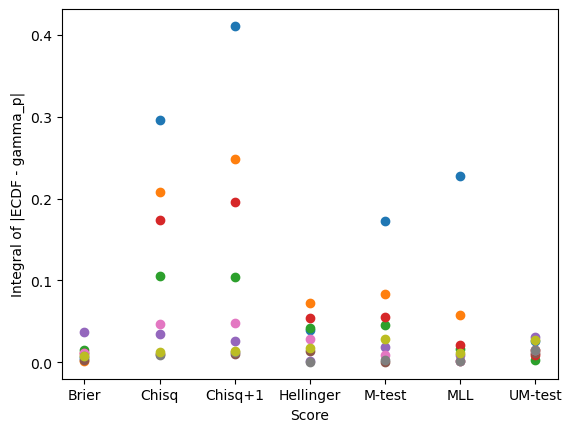

In [101]:
gamma_values = np.arange(0,1,0.01)

ecdf_t = df_over[df_over['Mc'] == 5]
ecdf_t = ecdf_t[df_over['b'] == 0.75]  
res_list = []

for mc_b, df in df_over.groupby(['Mc', 'b']):
    mc = mc_b[0]
    b = mc_b[1]
    for score, df_s in df.groupby('score'):
        sorted_values = np.sort(df_s['value'])
        ecdf = [np.mean(sorted_values <= x) for x in gamma_values]
        res_list.append([mc, b, score, np.abs(np.trapz(np.array(ecdf) - gamma_values, gamma_values) )])

dd_res = pd.DataFrame(res_list, columns = ['Mc', 'b', 'score', 'integral'])

for mc_b, df in dd_res.groupby(['Mc', 'b']):
    plt.scatter(df['score'], df['integral'], label=f'Mc={mc_b[0]}, b={mc_b[1]}')
plt.ylabel('Integral of |ECDF - gamma_p|')  
plt.xlabel('Score')
plt.show()

In [45]:
df_under = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/df_ecdf_under.csv')
for score in df_under['score'].unique():
    df_under.loc[df_under['score'] == score,'score'] = score_names[score]

C:\Users\jb24583\AppData\Local\Temp\ipykernel_48304\576609623.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ecdf_toplot = ecdf_toplot[df_under['b'] == 0.75]
C:\Users\jb24583\AppData\Local\Temp\ipykernel_48304\576609623.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ecdf_toplot = ecdf_toplot[df_under['b'] == 0.75]
C:\Users\jb24583\AppData\Local\Temp\ipykernel_48304\576609623.py:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ecdf_toplot = ecdf_toplot[df_under['b'] == 0.75]
C:\Users\jb24583\AppData\Local\Temp\ipykernel_48304\576609623.py:80: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ecdf_toplot = ecdf_toplot[df_under['b'] == 1]
C:\Users\jb24583\AppData\Local\Temp\ipykernel_48304\576609623.py:103: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ecdf_toplot = ecdf_toplot[df_under['b'] == 1]
C:\Users\jb24583\AppData\L

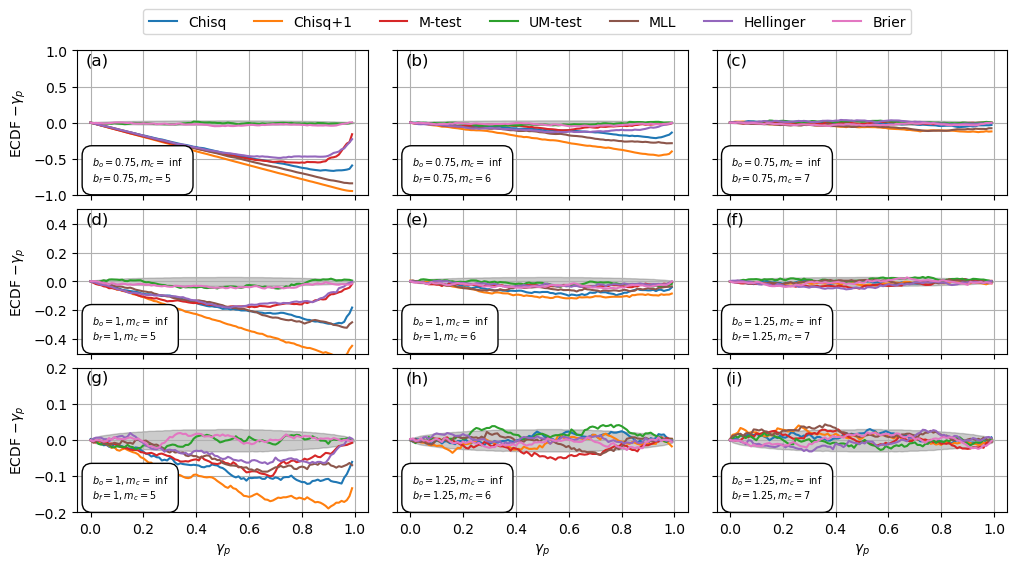

In [46]:
import matplotlib.cm as cm
#colors = cm.copper(np.linspace(0, 1, len(ecdf_toplot['score'].unique())))
y_lim = [-1, 1]
handles, labels = [], []
gamma_values = np.arange(0,1,0.01)
fig, axes = plt.subplots(3, 3, figsize=(12, 6))

ecdf_toplot = df_under[df_under['Mc'] == 5]
ecdf_toplot = ecdf_toplot[df_under['b'] == 0.75]  
for idx, score in enumerate(ecdf_toplot['score'].unique()):
    ecdf_toplot_red = ecdf_toplot[ecdf_toplot['score'] == score]
    #line, = sns.ecdfplot(ecdf_toplot_red['value'], label = score, color = colors[idx], ax = axes[0,0])#
    sorted_values = np.sort(ecdf_toplot_red['value'])
    ecdf = [np.mean(sorted_values <= x) for x in gamma_values]
    line, = axes[0,0].plot(gamma_values, ecdf - gamma_values, label = score, color = score_colors[score])
    handles.append(line)
    labels.append(score)
#axes[0,0].plot(unique_values, theo_quantiles.iloc[0,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
#axes[0,0].plot(unique_values, theo_quantiles.iloc[1,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
axes[0,0].fill_between(unique_values, theo_quantiles.iloc[0,:] - unique_values, theo_quantiles.iloc[1,:] - unique_values, color='black', alpha=0.2)
axes[0, 0].grid(True)
axes[0, 0].set_ylim(y_lim[0], y_lim[1])
axes[0, 0].set_xticklabels([])
axes[0, 0].set_ylabel('ECDF $- \gamma_p$')
text_str = '$b_o = 0.75, m_c = $ inf\n$b_f = 0.75, m_c = 5$' 
axes[0, 0].text(0.05, 0.17, text_str, transform=axes[0, 0].transAxes, 
                fontsize=7, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[0, 0].text(0.03, 0.9, '(a)', transform=axes[0, 0].transAxes, 
                fontsize=12)

ecdf_toplot = df_under[df_under['Mc'] == 6]
ecdf_toplot = ecdf_toplot[df_under['b'] == 0.75]  
for idx, score in enumerate(ecdf_toplot['score'].unique()):
    ecdf_toplot_red = ecdf_toplot[ecdf_toplot['score'] == score]
    #line, = sns.ecdfplot(ecdf_toplot_red['value'], label = score, color = colors[idx], ax = axes[0,0])#
    sorted_values = np.sort(ecdf_toplot_red['value'])
    ecdf = [np.mean(sorted_values <= x) for x in gamma_values]
    line, = axes[0, 1].plot(gamma_values, ecdf - gamma_values, label = score, color = score_colors[score])
    
#axes[0,0].plot(unique_values, theo_quantiles.iloc[0,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
#axes[0,0].plot(unique_values, theo_quantiles.iloc[1,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
axes[0, 1].fill_between(unique_values, theo_quantiles.iloc[0,:] - unique_values, theo_quantiles.iloc[1,:] - unique_values, color='black', alpha=0.2)
axes[0, 1].grid(True)
axes[0, 1].set_ylim(y_lim[0], y_lim[1])
axes[0, 1].set_xticklabels([])
axes[0, 1].set_yticklabels([])
axes[0, 1].set_ylabel('')
text_str = '$b_o = 0.75, m_c = $ inf\n$b_f = 0.75, m_c = 6$' 
axes[0, 1].text(0.05, 0.17, text_str, transform=axes[0, 1].transAxes, 
                fontsize=7, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[0, 1].text(0.03, 0.9, '(b)', transform=axes[0, 1].transAxes, 
                fontsize=12)

ecdf_toplot = df_under[df_under['Mc'] == 7]
ecdf_toplot = ecdf_toplot[df_under['b'] == 0.75]  
for idx, score in enumerate(ecdf_toplot['score'].unique()):
    ecdf_toplot_red = ecdf_toplot[ecdf_toplot['score'] == score]
    #line, = sns.ecdfplot(ecdf_toplot_red['value'], label = score, color = colors[idx], ax = axes[0,0])#
    sorted_values = np.sort(ecdf_toplot_red['value'])
    ecdf = [np.mean(sorted_values <= x) for x in gamma_values]
    line, = axes[0, 2].plot(gamma_values, ecdf - gamma_values, label = score, color = score_colors[score])
  
#axes[0,0].plot(unique_values, theo_quantiles.iloc[0,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
#axes[0,0].plot(unique_values, theo_quantiles.iloc[1,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
axes[0, 2].fill_between(unique_values, theo_quantiles.iloc[0,:] - unique_values, theo_quantiles.iloc[1,:] - unique_values, color='black', alpha=0.2)
axes[0, 2].grid(True)
axes[0, 2].set_ylim(y_lim[0], y_lim[1])
axes[0, 2].set_xticklabels([])
axes[0, 2].set_yticklabels([])
axes[0, 2].set_ylabel('')
text_str = '$b_o = 0.75, m_c = $ inf\n$b_f = 0.75, m_c = 7$' 
axes[0, 2].text(0.05, 0.17, text_str, transform=axes[0, 2].transAxes, 
                fontsize=7, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[0, 2].text(0.03, 0.9, '(c)', transform=axes[0, 2].transAxes, 
                fontsize=12)
ecdf_toplot = df_under[df_under['Mc'] == 5]
ecdf_toplot = ecdf_toplot[df_under['b'] == 1]  
for idx, score in enumerate(ecdf_toplot['score'].unique()):
    ecdf_toplot_red = ecdf_toplot[ecdf_toplot['score'] == score]
    #line, = sns.ecdfplot(ecdf_toplot_red['value'], label = score, color = colors[idx], ax = axes[0,0])#
    sorted_values = np.sort(ecdf_toplot_red['value'])
    ecdf = [np.mean(sorted_values <= x) for x in gamma_values]
    line, = axes[1, 0].plot(gamma_values, ecdf - gamma_values, label = score, color = score_colors[score])

y_lim = [-0.5, 0.5]

axes[1, 0].fill_between(unique_values, theo_quantiles.iloc[0,:] - unique_values, theo_quantiles.iloc[1,:] - unique_values, color='black', alpha=0.2)
axes[1, 0].grid(True)
axes[1, 0].set_ylim(y_lim[0], y_lim[1])
axes[1, 0].set_xticklabels([])
axes[1, 0].set_ylabel('ECDF $- \gamma_p$')
text_str = '$b_o = 1, m_c = $ inf\n$b_f = 1, m_c = 5$' 
axes[1, 0].text(0.05, 0.17, text_str, transform=axes[1, 0].transAxes, 
                fontsize=7, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[1, 0].text(0.03, 0.9, '(d)', transform=axes[1, 0].transAxes, 
                fontsize=12)

ecdf_toplot = df_under[df_under['Mc'] == 6]
ecdf_toplot = ecdf_toplot[df_under['b'] == 1]  
for idx, score in enumerate(ecdf_toplot['score'].unique()):
    ecdf_toplot_red = ecdf_toplot[ecdf_toplot['score'] == score]
    #line, = sns.ecdfplot(ecdf_toplot_red['value'], label = score, color = colors[idx], ax = axes[0,0])#
    sorted_values = np.sort(ecdf_toplot_red['value'])
    ecdf = [np.mean(sorted_values <= x) for x in gamma_values]
    line, = axes[1, 1].plot(gamma_values, ecdf - gamma_values, label = score, color = score_colors[score])
   
#axes[0,0].plot(unique_values, theo_quantiles.iloc[0,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
#axes[0,0].plot(unique_values, theo_quantiles.iloc[1,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
axes[1, 1].fill_between(unique_values, theo_quantiles.iloc[0,:] - unique_values, theo_quantiles.iloc[1,:] - unique_values, color='black', alpha=0.2)
axes[1, 1].grid(True)
axes[1, 1].set_ylim(y_lim[0], y_lim[1])
axes[1, 1].set_xticklabels([])
axes[1, 1].set_yticklabels([])
axes[1, 1].set_ylabel('')
text_str = '$b_o = 1, m_c = $ inf\n$b_f = 1, m_c = 6$' 
axes[1, 1].text(0.05, 0.17, text_str, transform=axes[1, 1].transAxes, 
                fontsize=7, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[1, 1].text(0.03, 0.9, '(e)', transform=axes[1, 1].transAxes, 
                fontsize=12)
ecdf_toplot = df_under[df_under['Mc'] == 7]
ecdf_toplot = ecdf_toplot[df_under['b'] == 1]  
for idx, score in enumerate(ecdf_toplot['score'].unique()):
    ecdf_toplot_red = ecdf_toplot[ecdf_toplot['score'] == score]
    #line, = sns.ecdfplot(ecdf_toplot_red['value'], label = score, color = colors[idx], ax = axes[0,0])#
    sorted_values = np.sort(ecdf_toplot_red['value'])
    ecdf = [np.mean(sorted_values <= x) for x in gamma_values]
    line, = axes[1, 2].plot(gamma_values, ecdf - gamma_values, label = score, color = score_colors[score])
 
#axes[0,0].plot(unique_values, theo_quantiles.iloc[0,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
#axes[0,0].plot(unique_values, theo_quantiles.iloc[1,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
axes[1, 2].fill_between(unique_values, theo_quantiles.iloc[0,:] - unique_values, theo_quantiles.iloc[1,:] - unique_values, color='black', alpha=0.2)
axes[1, 2].grid(True)
axes[1, 2].set_ylim(y_lim[0], y_lim[1])
axes[1, 2].set_xticklabels([])
axes[1, 2].set_yticklabels([])
axes[1, 2].set_ylabel('')
text_str = '$b_o = 1.25, m_c = $ inf \n$b_f = 1.25, m_c = 7$' 
axes[1, 2].text(0.05, 0.17, text_str, transform=axes[1, 2].transAxes, 
                fontsize=7, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[1, 2].text(0.03, 0.9, '(f)', transform=axes[1, 2].transAxes, 
                fontsize=12)

ecdf_toplot = df_under[df_under['Mc'] == 5]
ecdf_toplot = ecdf_toplot[df_under['b'] == 1.25]  
for idx, score in enumerate(ecdf_toplot['score'].unique()):
    ecdf_toplot_red = ecdf_toplot[ecdf_toplot['score'] == score]
    #line, = sns.ecdfplot(ecdf_toplot_red['value'], label = score, color = colors[idx], ax = axes[0,0])#
    sorted_values = np.sort(ecdf_toplot_red['value'])
    ecdf = [np.mean(sorted_values <= x) for x in gamma_values]
    line, = axes[2, 0].plot(gamma_values, ecdf - gamma_values, label = score, color = score_colors[score])
   

y_lim = [-0.2, 0.2]

axes[2, 0].fill_between(unique_values, theo_quantiles.iloc[0,:] - unique_values, theo_quantiles.iloc[1,:] - unique_values, color='black', alpha=0.2)
axes[2, 0].grid(True)
axes[2, 0].set_ylim(y_lim[0], y_lim[1])
axes[2, 0].set_ylabel('ECDF $- \gamma_p$')
axes[2, 0].set_xlabel('$\gamma_p$')
text_str = '$b_o = 1, m_c = $ inf\n$b_f = 1, m_c = 5 $' 
axes[2, 0].text(0.05, 0.17, text_str, transform=axes[2, 0].transAxes, 
                fontsize=7, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[2, 0].text(0.03, 0.9, '(g)', transform=axes[2, 0].transAxes, 
                fontsize=12)

ecdf_toplot = df_under[df_under['Mc'] == 6]
ecdf_toplot = ecdf_toplot[df_under['b'] == 1.25]  
for idx, score in enumerate(ecdf_toplot['score'].unique()):
    ecdf_toplot_red = ecdf_toplot[ecdf_toplot['score'] == score]
    #line, = sns.ecdfplot(ecdf_toplot_red['value'], label = score, color = colors[idx], ax = axes[0,0])#
    sorted_values = np.sort(ecdf_toplot_red['value'])
    ecdf = [np.mean(sorted_values <= x) for x in gamma_values]
    line, = axes[2, 1].plot(gamma_values, ecdf - gamma_values, label = score, color = score_colors[score])
    
#axes[0,0].plot(unique_values, theo_quantiles.iloc[0,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
#axes[0,0].plot(unique_values, theo_quantiles.iloc[1,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
axes[2, 1].fill_between(unique_values, theo_quantiles.iloc[0,:] - unique_values, theo_quantiles.iloc[1,:] - unique_values, color='black', alpha=0.2)
axes[2, 1].grid(True)
axes[2, 1].set_ylim(y_lim[0], y_lim[1])
axes[2, 1].set_yticklabels([])
axes[2, 1].set_ylabel('')
axes[2, 1].set_xlabel('$\gamma_p$')
text_str = '$b_o = 1.25, m_c = $ inf\n$b_f = 1.25, m_c = 6$' 
axes[2, 1].text(0.05, 0.17, text_str, transform=axes[2, 1].transAxes, 
                fontsize=7, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[2, 1].text(0.03, 0.9, '(h)', transform=axes[2, 1].transAxes, 
                fontsize=12)
ecdf_toplot = df_under[df_under['Mc'] == 7]
ecdf_toplot = ecdf_toplot[df_under['b'] == 1.25]  
for idx, score in enumerate(ecdf_toplot['score'].unique()):
    ecdf_toplot_red = ecdf_toplot[ecdf_toplot['score'] == score]
    #line, = sns.ecdfplot(ecdf_toplot_red['value'], label = score, color = colors[idx], ax = axes[0,0])#
    sorted_values = np.sort(ecdf_toplot_red['value'])
    ecdf = [np.mean(sorted_values <= x) for x in gamma_values]
    line, = axes[2, 2].plot(gamma_values, ecdf - gamma_values, label = score, color = score_colors[score])
    
#axes[0,0].plot(unique_values, theo_quantiles.iloc[0,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
#axes[0,0].plot(unique_values, theo_quantiles.iloc[1,:] - unique_values,  color='black', linestyle='--', linewidth = 1)
axes[2, 2].fill_between(unique_values, theo_quantiles.iloc[0,:] - unique_values, theo_quantiles.iloc[1,:] - unique_values, color='black', alpha=0.2)
axes[2, 2].grid(True)
axes[2, 2].set_ylim(y_lim[0], y_lim[1])
axes[2, 2].set_yticklabels([])
axes[2, 2].set_ylabel('')
axes[2, 2].set_xlabel('$\gamma_p$')

text_str = '$b_o = 1.25, m_c = $ inf\n$b_f = 1.25, m_c = 7$' 
axes[2, 2].text(0.05, 0.17, text_str, transform=axes[2, 2].transAxes, 
                fontsize=7, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[2, 2].text(0.03, 0.9, '(i)', transform=axes[2, 2].transAxes, 
                fontsize=12)
fig.subplots_adjust(hspace=0.1, wspace=0.1) 
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.96), ncol=len(handles))

plt.savefig('C:/Users/jb24583/m_test_code/M_test/tapgr_under.png', dpi=500, bbox_inches='tight')

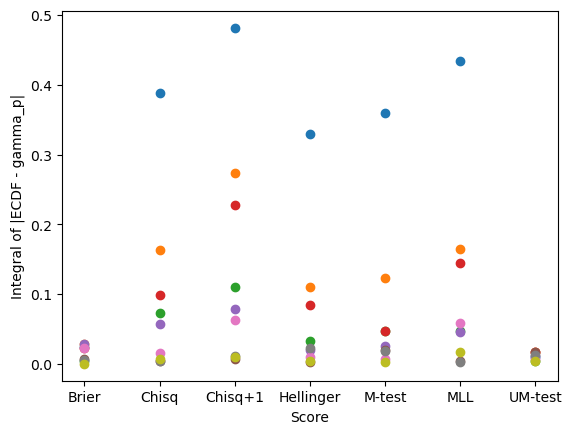

In [102]:
gamma_values = np.arange(0,1,0.01)

res_list = []

for mc_b, df in df_under.groupby(['Mc', 'b']):
    mc = mc_b[0]
    b = mc_b[1]
    for score, df_s in df.groupby('score'):
        sorted_values = np.sort(df_s['value'])
        ecdf = [np.mean(sorted_values <= x) for x in gamma_values]
        res_list.append([mc, b, score, np.abs(np.trapz(np.array(ecdf) - gamma_values, gamma_values) )])

dd_res = pd.DataFrame(res_list, columns = ['Mc', 'b', 'score', 'integral'])

for mc_b, df in dd_res.groupby(['Mc', 'b']):
    plt.scatter(df['score'], df['integral'], label=f'Mc={mc_b[0]}, b={mc_b[1]}')
plt.ylabel('Integral of |ECDF - gamma_p|')  
plt.xlabel('Score')
plt.show()

In [47]:
df_M0_N_under = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/df_M0_N_under.csv')
df_M0_N_over = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/df_M0_N_over.csv')

df_M0_N_over

,Unnamed: 0,Brier,Chisq,Chisq.p1,Hellinger,Mtest,Mtest.un,Multinomial,N,M0
0,1,0.059,0.056,0.072,0.057,0.065,0.041,0.048,10,2.5
1,2,0.041,0.039,0.045,0.069,0.049,0.046,0.054,25,2.5
2,3,0.039,0.059,0.061,0.049,0.040,0.045,0.053,50,2.5
3,4,0.053,0.041,0.031,0.063,0.040,0.074,0.043,100,2.5
4,5,0.051,0.017,0.016,0.042,0.067,0.051,0.060,200,2.5
5,6,0.053,0.025,0.022,0.056,0.055,0.057,0.024,350,2.5
6,7,0.057,0.025,0.013,0.049,0.046,0.043,0.047,500,2.5
7,8,0.054,0.031,0.023,0.055,0.062,0.063,0.063,10,4.0
8,9,0.055,0.028,0.024,0.049,0.060,0.065,0.052,25,4.0
9,10,0.059,0.033,0.026,0.041,0.064,0.060,0.054,50,4.0


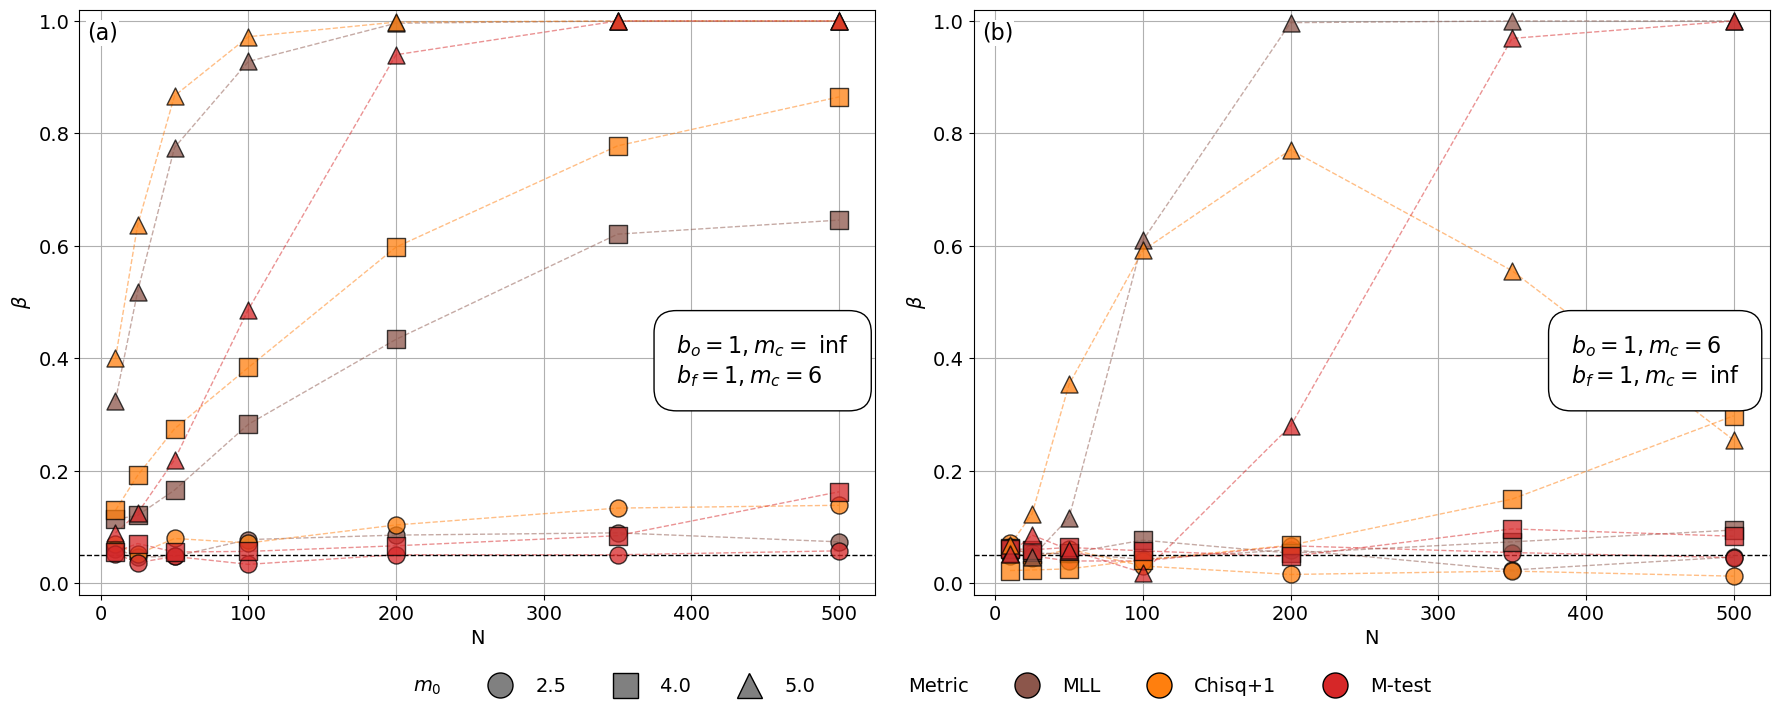

In [56]:
from matplotlib.lines import Line2D

unique_m0 = sorted(df_M0_N_under['M0'].unique())
markers = ['o', 's', '^']  # circle, square, triangle_up
marker_map = dict(zip(unique_m0, markers))
point_s = 150

# Create the plot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))


for m0_val in unique_m0:
    subset = df_M0_N_under[df_M0_N_under['M0'] == m0_val]
    axes[0].scatter(subset['N'], subset['Multinomial'],
                marker=marker_map[m0_val],
                color = score_colors['MLL'],
                label=f'{m0_val}', edgecolor = 'black',
                alpha=0.75, zorder = 3, s = point_s)
    axes[0].plot(subset['N'], subset['Multinomial'], 
                 color = score_colors['MLL'], 
                 linestyle='--', linewidth=1, 
                 zorder=2, alpha = 0.5)
    axes[0].scatter(subset['N'], subset['Chisq.p1'],
                marker=marker_map[m0_val],
                color = score_colors['Chisq+1'],
                label=f'{m0_val}', edgecolor = 'black',
                alpha=0.75, zorder = 3, s = point_s)
    axes[0].plot(subset['N'], subset['Chisq.p1'], 
                 color = score_colors['Chisq+1'], 
                 linestyle='--', linewidth=1, 
                 zorder=2, alpha = 0.5)
    axes[0].scatter(subset['N'], subset['Mtest'],
                marker=marker_map[m0_val],
                color = score_colors['M-test'],
                label=f'{m0_val}', edgecolor = 'black',
                alpha=0.75, zorder = 3, s = point_s)
    axes[0].plot(subset['N'], subset['Mtest'], 
                 color = score_colors['M-test'], 
                 linestyle='--', linewidth=1, 
                 zorder=2, alpha = 0.5)
    

axes[0].set_xlabel('N', fontsize = 14)
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)

axes[0].set_ylabel(r'$\beta$', fontsize = 14) 

axes[0].grid(True, zorder = 0)
axes[0].axhline(0.05, color='black', linestyle='--', linewidth=1, zorder=2)
axes[0].set_ylim(-0.02, 1.02)
text_str = '$b_o = 1, m_c = $ inf\n$b_f = 1, m_c = 6$' 
axes[0].text(0.75, 0.4, text_str, transform=axes[0].transAxes, 
                fontsize=16, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[0].text(
    0.01, 0.98,       # X and Y position in axes coords (0 = left/bottom, 1 = right/top)
    '(a)',            # The label
    transform=axes[0].transAxes,
    fontsize=16,
    va='top',
    ha='left',
    zorder=20,             # Make sure it's above boxplots, grid, etc.
    bbox=dict(facecolor='white', edgecolor='none', pad=1)
)

for m0_val in unique_m0:
    subset = df_M0_N_over[df_M0_N_over['M0'] == m0_val]
    axes[1].scatter(subset['N'], subset['Multinomial'],
                marker=marker_map[m0_val],
                color = score_colors['MLL'],
                label=f'{m0_val}', edgecolor = 'black',
                alpha=0.75, zorder = 3, s = point_s)
    axes[1].plot(subset['N'], subset['Multinomial'], 
                 color = score_colors['MLL'], 
                 linestyle='--', linewidth=1, 
                 zorder=2, alpha = 0.5)
    axes[1].scatter(subset['N'], subset['Chisq.p1'],
                marker=marker_map[m0_val],
                color = score_colors['Chisq+1'],
                label=f'{m0_val}', edgecolor = 'black',
                alpha=0.75, zorder = 3, s = point_s)
    axes[1].plot(subset['N'], subset['Chisq.p1'], 
                 color = score_colors['Chisq+1'], 
                 linestyle='--', linewidth=1, 
                 zorder=2, alpha = 0.5)
    axes[1].scatter(subset['N'], subset['Mtest'],
                marker=marker_map[m0_val],
                color = score_colors['M-test'],
                label=f'{m0_val}', edgecolor = 'black',
                alpha=0.75, zorder = 3, s = point_s)
    axes[1].plot(subset['N'], subset['Mtest'], 
                 color = score_colors['M-test'], 
                 linestyle='--', linewidth=1, 
                 zorder=2, alpha = 0.5)
axes[1].set_xlabel('N', fontsize = 14)
axes[1].set_ylabel(r'$\beta$', fontsize = 14)
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)

axes[1].grid(True, zorder = 0)
axes[1].axhline(0.05, color='black', linestyle='--', linewidth=1, zorder=2)
axes[1].set_ylim(-0.02, 1.02)
text_str = '$b_o = 1, m_c = 6$\n$b_f = 1, m_c = $ inf' 
axes[1].text(0.75, 0.4, text_str, transform=axes[1].transAxes, 
                fontsize=16, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[1].text(
    0.01, 0.98,       # X and Y position in axes coords (0 = left/bottom, 1 = right/top)
    '(b)',            # The label
    transform=axes[1].transAxes,
    fontsize=16,
    va='top',
    ha='left',
    zorder=20,             # Make sure it's above boxplots, grid, etc.
    bbox=dict(facecolor='white', edgecolor='none', pad=1)
)



shape_handles = [
    Line2D([], [], marker=marker_map[m0], color='gray', label=f'{m0}',
           linestyle='None', markersize=18, markerfacecolor='gray', markeredgecolor='black')
    for m0 in unique_m0
]
m0_title_handle = Line2D([], [], linestyle='None', label=r'$m_0$')
score_handles = [
    Line2D([], [], marker='o', color=color, label=score,
           linestyle='None', markersize=18, markerfacecolor=color, markeredgecolor='black')
    for score, color in {
        'MLL': score_colors['MLL'],
        'Chisq+1': score_colors['Chisq+1'],
        'M-test': score_colors['M-test']
    }.items()
]
score_title_handle = Line2D([], [], linestyle='None', label='Metric')

legend_handles = [m0_title_handle] + shape_handles + [score_title_handle] + score_handles
fig.legend(handles=legend_handles,
          loc='lower center',
          bbox_to_anchor=(0.5, -0.2),
          ncol=len(legend_handles),
          frameon=False,
          fontsize=14,
          title=None)

#plt.gca().add_artist(legend1)  # Add first legend manually


plt.tight_layout()
plt.subplots_adjust(bottom=0.0)  # Add space at the bottom for legend
plt.savefig('C:/Users/jb24583/m_test_code/M_test/beta_N_M0_scores.png', dpi=500, bbox_inches='tight')
plt.show()


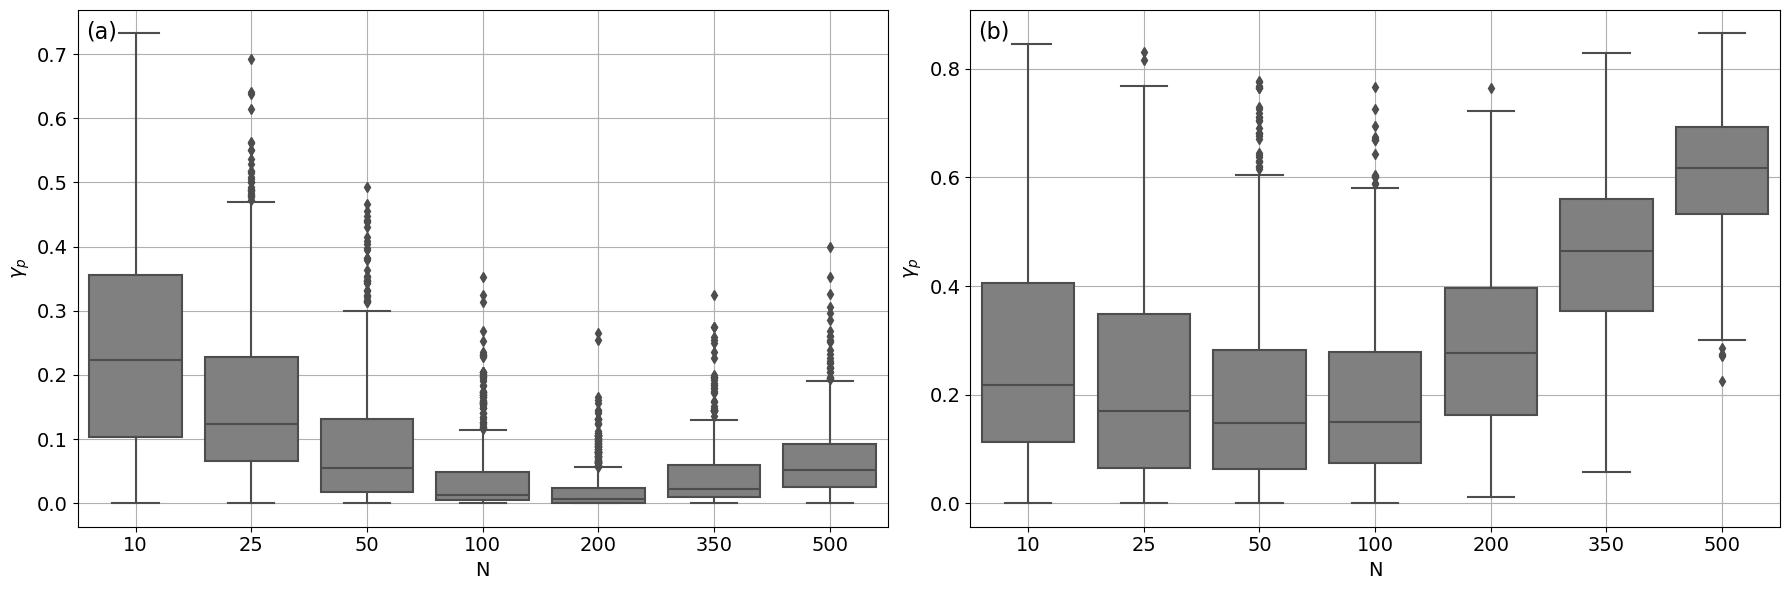

In [60]:
df_Nbb = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/df_Nbb.csv')
df_Nbb_red = df_Nbb[df_Nbb['gamma.score'] == 'Chisq.p1']
df_Nbb_red = df_Nbb_red[df_Nbb_red['M0'] == 5]

fig, ax = plt.subplots(1,2, figsize=(18, 6))
sns.boxplot(x='N', y='gamma.value', data=df_Nbb_red, color = 'grey', ax = ax[0])
for artist in ax[0].patches:  # The boxes
    artist.set_zorder(3)
for line in ax[0].lines:      # Whiskers, caps, medians, etc.
    line.set_zorder(3)

ax[0].grid(True, zorder = 0)
ax[0].set_ylabel(r'$\gamma_p$')
ax[0].text(
    0.01, 0.98,       # X and Y position in axes coords (0 = left/bottom, 1 = right/top)
    '(a)',            # The label
    transform=ax[0].transAxes,
    fontsize=16,
    va='top',
    ha='left',
    zorder=20,             # Make sure it's above boxplots, grid, etc.
    bbox=dict(facecolor='white', edgecolor='none', pad=1)
)

ax[0].set_ylabel(r'$\gamma_p$', fontsize = 14)
ax[0].set_xlabel('N', fontsize = 14)

ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)


df_Nbb_red = df_Nbb[df_Nbb['gamma.score'] == 'Chisq']
df_Nbb_red = df_Nbb_red[df_Nbb_red['M0'] == 5]
sns.boxplot(x='N', y='gamma.value', data=df_Nbb_red, color = 'grey', ax = ax[1])
for artist in ax[1].patches:  # The boxes
    artist.set_zorder(3)
for line in ax[1].lines:      # Whiskers, caps, medians, etc.
    line.set_zorder(3)

ax[1].grid(True, zorder = 0)
ax[1].set_ylabel(r'$\gamma_p$', fontsize = 14)
ax[1].set_xlabel('N', fontsize = 14)

ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)

ax[1].text(
    0.01, 0.98,       # X and Y position in axes coords (0 = left/bottom, 1 = right/top)
    '(b)',            # The label
    transform=ax[1].transAxes,
    fontsize=16,
    va='top',
    ha='left',
    zorder=20,             # Make sure it's above boxplots, grid, etc.
    bbox=dict(facecolor='white', edgecolor='none', pad=1)
)


plt.tight_layout()
plt.savefig('C:/Users/jb24583/m_test_code/M_test/gamma_N_chisq.png', dpi=500, bbox_inches='tight')

plt.show()

In [61]:
df_M0_N_under_classic = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/df_M0_N_under_classic_stats.csv')
df_M0_N_over_classic = pd.read_csv('C:/Users/jb24583/m_test_code/M_test/df_M0_N_over_classic_stats.csv')

classic_colors = cm.get_cmap('Set2').colors[0:3]

classic_stat_colors = {'KS':classic_colors[1], 'AD':classic_colors[0], 'WIL':classic_colors[2]}

C:\Users\jb24583\AppData\Local\Temp\ipykernel_48304\1128993994.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  classic_colors = cm.get_cmap('Set2').colors[0:3]


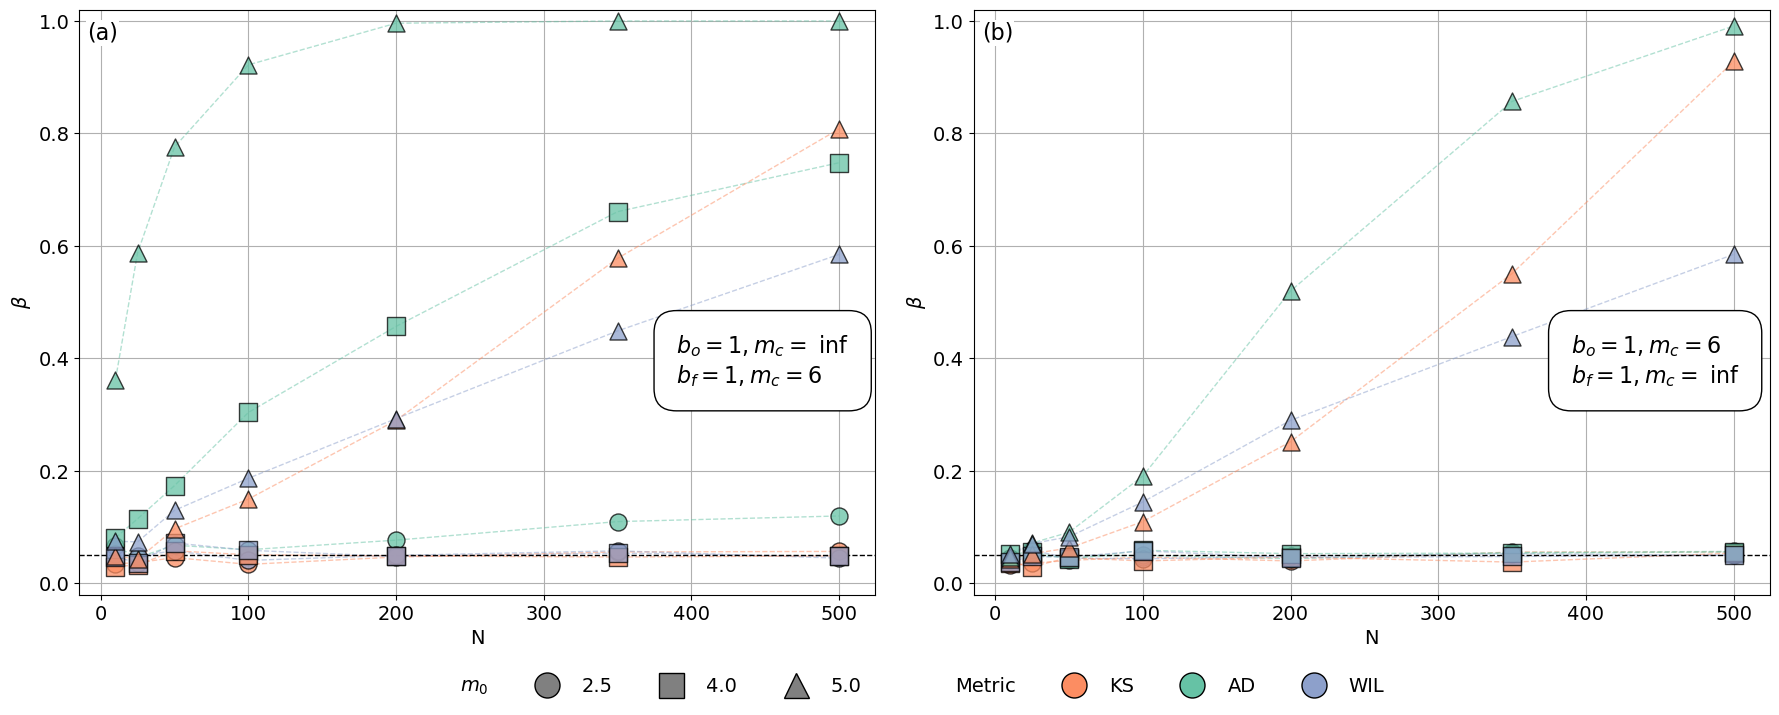

In [64]:
from matplotlib.lines import Line2D

unique_m0 = sorted(df_M0_N_under['M0'].unique())
markers = ['o', 's', '^']  # circle, square, triangle_up
marker_map = dict(zip(unique_m0, markers))

# Create the plot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))


for m0_val in unique_m0:
    subset = df_M0_N_under_classic[df_M0_N_under['M0'] == m0_val]
    axes[0].scatter(subset['N'], subset['ks'],
                marker=marker_map[m0_val],
                color = classic_stat_colors['KS'],
                label=f'{m0_val}', edgecolor = 'black',
                alpha=0.75, zorder = 3, s = point_s)
    axes[0].plot(subset['N'], subset['ks'], 
                 color = classic_stat_colors['KS'], 
                 linestyle='--', linewidth=1, 
                 zorder=2, alpha = 0.5)
    axes[0].scatter(subset['N'], subset['ad'],
                marker=marker_map[m0_val],
                color = classic_stat_colors['AD'],
                label=f'{m0_val}', edgecolor = 'black',
                alpha=0.75, zorder = 3, s = point_s)
    axes[0].plot(subset['N'], subset['ad'], 
                 color = classic_stat_colors['AD'], 
                 linestyle='--', linewidth=1, 
                 zorder=2, alpha = 0.5)
    axes[0].scatter(subset['N'], subset['wil'],
                marker=marker_map[m0_val],
                color = classic_stat_colors['WIL'],
                label=f'{m0_val}', edgecolor = 'black',
                alpha=0.75, zorder = 3, s = point_s)
    axes[0].plot(subset['N'], subset['wil'], 
                 color = classic_stat_colors['WIL'], 
                 linestyle='--', linewidth=1, 
                 zorder=2, alpha = 0.5)
    

axes[0].set_xlabel('N', fontsize = 14)
axes[0].set_ylabel(r'$\beta$', fontsize = 14) 
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)

axes[0].grid(True, zorder = 0)
axes[0].axhline(0.05, color='black', linestyle='--', linewidth=1, zorder=2)
axes[0].set_ylim(-0.02, 1.02)
text_str = '$b_o = 1, m_c = $ inf\n$b_f = 1, m_c = 6$' 
axes[0].text(0.75, 0.4, text_str, transform=axes[0].transAxes, 
                fontsize=16, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[0].text(
    0.01, 0.98,       # X and Y position in axes coords (0 = left/bottom, 1 = right/top)
    '(a)',            # The label
    transform=axes[0].transAxes,
    fontsize=16,
    va='top',
    ha='left',
    zorder=20,             # Make sure it's above boxplots, grid, etc.
    bbox=dict(facecolor='white', edgecolor='none', pad=1)
)

for m0_val in unique_m0:
    subset = df_M0_N_over_classic[df_M0_N_over['M0'] == m0_val]
    axes[1].scatter(subset['N'], subset['ks'],
                marker=marker_map[m0_val],
                color = classic_stat_colors['KS'],
                label=f'{m0_val}', edgecolor = 'black',
                alpha=0.75, zorder = 3, s = point_s)
    axes[1].plot(subset['N'], subset['ks'], 
                 color = classic_stat_colors['KS'], 
                 linestyle='--', linewidth=1, 
                 zorder=2, alpha = 0.5)
    axes[1].scatter(subset['N'], subset['ad'],
                marker=marker_map[m0_val],
                color = classic_stat_colors['AD'],
                label=f'{m0_val}', edgecolor = 'black',
                alpha=0.75, zorder = 3, s = point_s)
    axes[1].plot(subset['N'], subset['ad'], 
                 color = classic_stat_colors['AD'], 
                 linestyle='--', linewidth=1, 
                 zorder=2, alpha = 0.5)
    axes[1].scatter(subset['N'], subset['wil'],
                marker=marker_map[m0_val],
                color = classic_stat_colors['WIL'],
                label=f'{m0_val}', edgecolor = 'black',
                alpha=0.75, zorder = 3, s = point_s)
    axes[1].plot(subset['N'], subset['wil'], 
                 color = classic_stat_colors['WIL'], 
                 linestyle='--', linewidth=1, 
                 zorder=2, alpha = 0.5)
    


axes[1].set_xlabel('N', fontsize = 14)
axes[1].set_ylabel(r'$\beta$', fontsize = 14) 
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)
axes[1].grid(True, zorder = 0)
axes[1].axhline(0.05, color='black', linestyle='--', linewidth=1, zorder=2)
axes[1].set_ylim(-0.02, 1.02)
text_str = '$b_o = 1, m_c = 6$\n$b_f = 1, m_c = $ inf' 
axes[1].text(0.75, 0.4, text_str, transform=axes[1].transAxes, 
                fontsize=16, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))

axes[1].text(
    0.01, 0.98,       # X and Y position in axes coords (0 = left/bottom, 1 = right/top)
    '(b)',            # The label
    transform=axes[1].transAxes,
    fontsize=16,
    va='top',
    ha='left',
    zorder=20,             # Make sure it's above boxplots, grid, etc.
    bbox=dict(facecolor='white', edgecolor='none', pad=1)
)


shape_handles = [
    Line2D([], [], marker=marker_map[m0], color='gray', label=f'{m0}',
           linestyle='None', markersize=18, markerfacecolor='gray', markeredgecolor='black')
    for m0 in unique_m0
]
m0_title_handle = Line2D([], [], linestyle='None', label=r'$m_0$')
score_handles = [
    Line2D([], [], marker='o', color=color, label=score,
           linestyle='None', markersize=18, markerfacecolor=color, markeredgecolor='black')
    for score, color in {
        'KS': classic_stat_colors['KS'],
        'AD': classic_stat_colors['AD'],
        'WIL': classic_stat_colors['WIL']
    }.items()
]
score_title_handle = Line2D([], [], linestyle='None', label='Metric')

legend_handles = [m0_title_handle] + shape_handles + [score_title_handle] + score_handles
fig.legend(handles=legend_handles,
          loc='lower center',
          bbox_to_anchor=(0.5, -0.2),
          ncol=len(legend_handles),
          fontsize=14,
          frameon=False,
          title=None)

#plt.gca().add_artist(legend1)  # Add first legend manually


plt.tight_layout()
plt.subplots_adjust(bottom=0.0)  # Add space at the bottom for legend
plt.savefig('C:/Users/jb24583/m_test_code/M_test/beta_N_M0_classic.png', dpi=500, bbox_inches='tight')
plt.show()

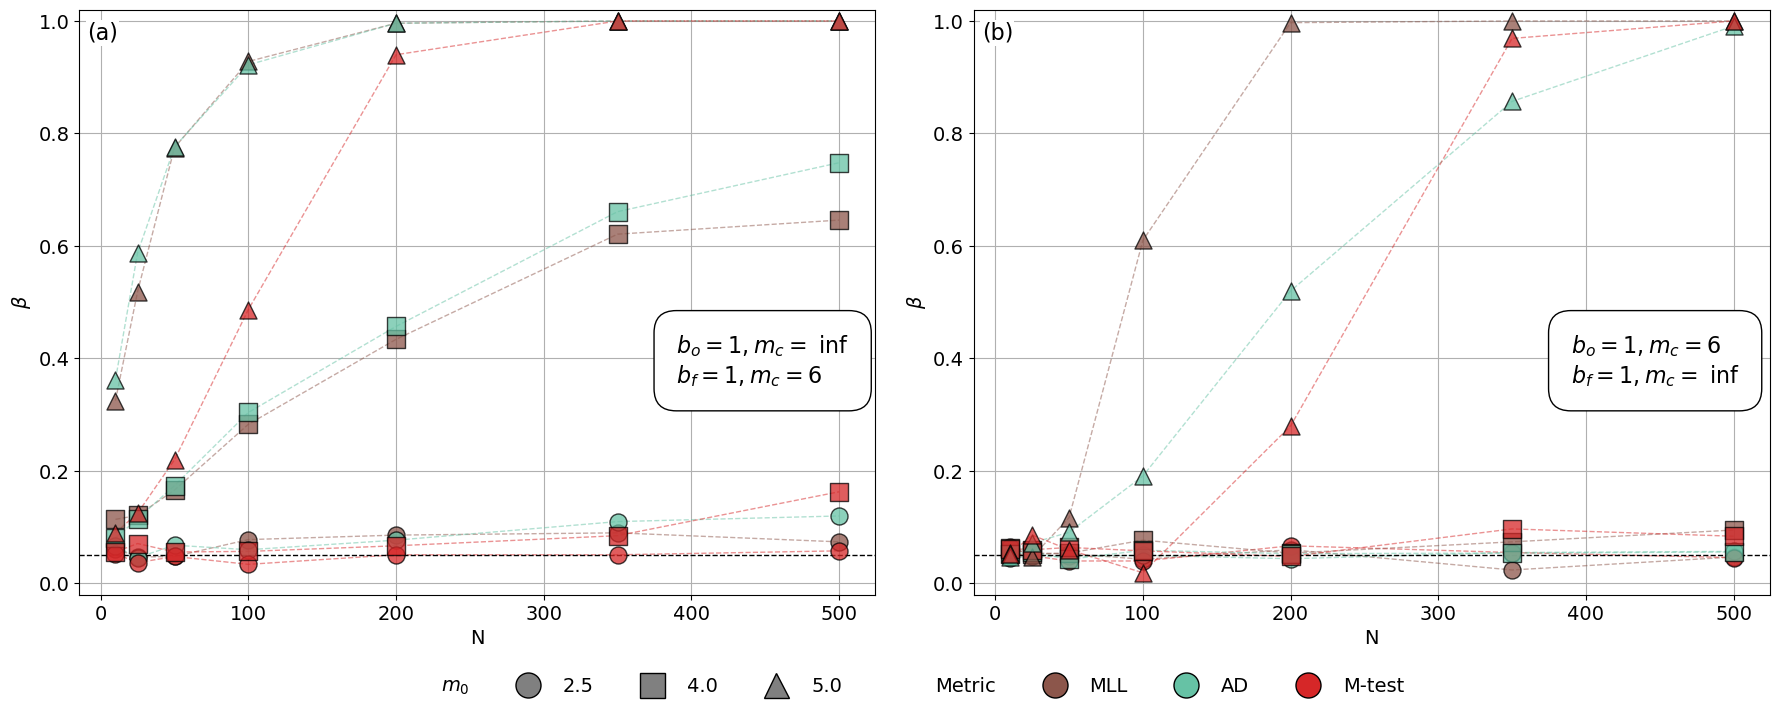

In [66]:
from matplotlib.lines import Line2D

unique_m0 = sorted(df_M0_N_under['M0'].unique())
markers = ['o', 's', '^']  # circle, square, triangle_up
marker_map = dict(zip(unique_m0, markers))

# Create the plot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))


for m0_val in unique_m0:
    subset = df_M0_N_under_classic[df_M0_N_under['M0'] == m0_val]
    axes[0].scatter(subset['N'], subset['Multinomial'],
                marker=marker_map[m0_val],
                color = score_colors['MLL'],
                label=f'{m0_val}', edgecolor = 'black',
                alpha=0.75, zorder = 3, s = point_s)
    axes[0].plot(subset['N'], subset['Multinomial'], 
                 color = score_colors['MLL'], 
                 linestyle='--', linewidth=1, 
                 zorder=2, alpha = 0.5)
    axes[0].scatter(subset['N'], subset['ad'],
                marker=marker_map[m0_val],
                color = classic_stat_colors['AD'],
                label=f'{m0_val}', edgecolor = 'black',
                alpha=0.75, zorder = 3, s = point_s)
    axes[0].plot(subset['N'], subset['ad'], 
                 color = classic_stat_colors['AD'], 
                 linestyle='--', linewidth=1, 
                 zorder=2, alpha = 0.5)
    axes[0].scatter(subset['N'], subset['Mtest'],
                marker=marker_map[m0_val],
                color = score_colors['M-test'],
                label=f'{m0_val}', edgecolor = 'black',
                alpha=0.75, zorder = 3, s = point_s)
    axes[0].plot(subset['N'], subset['Mtest'], 
                 color = score_colors['M-test'], 
                 linestyle='--', linewidth=1, 
                 zorder=2, alpha = 0.5)

axes[0].set_xlabel('N', fontsize = 14)
axes[0].set_ylabel(r'$\beta$', fontsize = 14) 
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].grid(True, zorder = 0)
axes[0].axhline(0.05, color='black', linestyle='--', linewidth=1, zorder=2)
axes[0].set_ylim(-0.02, 1.02)
text_str = '$b_o = 1, m_c = $ inf\n$b_f = 1, m_c = 6$' 
axes[0].text(0.75, 0.4, text_str, transform=axes[0].transAxes, 
                fontsize=16, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axes[0].text(
    0.01, 0.98,       # X and Y position in axes coords (0 = left/bottom, 1 = right/top)
    '(a)',            # The label
    transform=axes[0].transAxes,
    fontsize=16,
    va='top',
    ha='left',
    zorder=20,             # Make sure it's above boxplots, grid, etc.
    bbox=dict(facecolor='white', edgecolor='none', pad=1)
)

for m0_val in unique_m0:
    subset = df_M0_N_over_classic[df_M0_N_over['M0'] == m0_val]
    axes[1].scatter(subset['N'], subset['Multinomial'],
                marker=marker_map[m0_val],
                color = score_colors['MLL'],
                label=f'{m0_val}', edgecolor = 'black',
                alpha=0.75, zorder = 3, s = point_s)
    axes[1].plot(subset['N'], subset['Multinomial'], 
                 color = score_colors['MLL'], 
                 linestyle='--', linewidth=1, 
                 zorder=2, alpha = 0.5)
    axes[1].scatter(subset['N'], subset['ad'],
                marker=marker_map[m0_val],
                color = classic_stat_colors['AD'],
                label=f'{m0_val}', edgecolor = 'black',
                alpha=0.75, zorder = 3, s = point_s)
    axes[1].plot(subset['N'], subset['ad'], 
                 color = classic_stat_colors['AD'], 
                 linestyle='--', linewidth=1, 
                 zorder=2, alpha = 0.5)
    axes[1].scatter(subset['N'], subset['Mtest'],
                marker=marker_map[m0_val],
                color = score_colors['M-test'],
                label=f'{m0_val}', edgecolor = 'black',
                alpha=0.75, zorder = 3, s = point_s)
    axes[1].plot(subset['N'], subset['Mtest'], 
                 color = score_colors['M-test'], 
                 linestyle='--', linewidth=1, 
                 zorder=2, alpha = 0.5)


axes[1].set_xlabel('N', fontsize = 14)
axes[1].set_ylabel(r'$\beta$', fontsize = 14) 
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)
axes[1].grid(True, zorder = 0)
axes[1].axhline(0.05, color='black', linestyle='--', linewidth=1, zorder=2)
axes[1].set_ylim(-0.02, 1.02)
text_str = '$b_o = 1, m_c = 6$\n$b_f = 1, m_c = $ inf' 
axes[1].text(0.75, 0.4, text_str, transform=axes[1].transAxes, 
                fontsize=16, va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))

axes[1].text(
    0.01, 0.98,       # X and Y position in axes coords (0 = left/bottom, 1 = right/top)
    '(b)',            # The label
    transform=axes[1].transAxes,
    fontsize=16,
    va='top',
    ha='left',
    zorder=20,             # Make sure it's above boxplots, grid, etc.
    bbox=dict(facecolor='white', edgecolor='none', pad=1)
)


shape_handles = [
    Line2D([], [], marker=marker_map[m0], color='gray', label=f'{m0}',
           linestyle='None', markersize=18, markerfacecolor='gray', markeredgecolor='black')
    for m0 in unique_m0
]
m0_title_handle = Line2D([], [], linestyle='None', label=r'$m_0$')
score_handles = [
    Line2D([], [], marker='o', color=color, label=score,
           linestyle='None', markersize=18, markerfacecolor=color, markeredgecolor='black')
    for score, color in {
        'MLL': score_colors['MLL'],
        'AD': classic_stat_colors['AD'],
        'M-test': score_colors['M-test']
    }.items()
]
score_title_handle = Line2D([], [], linestyle='None', label='Metric')

legend_handles = [m0_title_handle] + shape_handles + [score_title_handle] + score_handles
fig.legend(handles=legend_handles,
          loc='lower center',
          bbox_to_anchor=(0.5, -0.2),
          ncol=len(legend_handles),
          frameon=False,
          fontsize=14,
          title=None)

#plt.gca().add_artist(legend1)  # Add first legend manually


plt.tight_layout()
plt.subplots_adjust(bottom=0.0)  # Add space at the bottom for legend
plt.savefig('C:/Users/jb24583/m_test_code/M_test/beta_N_M0_classic_scores.png', dpi=500, bbox_inches='tight')
plt.show()